# Vidio Plays Dataset
This notebook will guide you through my thoughts process and analysis of the data. You can also visit the [repository](https://github.com/archeltaneka/vidio-dataset-eda) for this notebook for more info about the development

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Download & Load the Dataset
Using the download link provided, I downloaded 2 files: 1% sampling and 10% sampling. In my opinion, it is always a good practice for every data scientist or software engineer to <b>implement something quick and dirty</b>. Our main objective is to get the "big picture" of the goal without wasting too much time focusing on something else. This is the main reason why I decided to use both datasets despite the file size. (Even the 10% sample one contains ~465 mb!)

`pandas` provides a convenient way to read in `.csv` files. I also optionally added a parameter `error_bad_lines=False`. The `error_bad_lines` param will skip (ignore) rows that do not have the same length with the columns. This is probably caused by program errors that incorrectly store the data according to the format.

In [3]:
# read csv file
df = pd.read_csv('./data/plays_1.csv', error_bad_lines=False) # skip those problematic lines with error_bad_lines=False

b'Skipping line 23509: expected 41 fields, saw 43\n'
b'Skipping line 36946: expected 41 fields, saw 42\nSkipping line 43788: expected 41 fields, saw 42\nSkipping line 45437: expected 41 fields, saw 49\n'
b'Skipping line 52141: expected 41 fields, saw 42\n'
b'Skipping line 73470: expected 41 fields, saw 42\nSkipping line 75103: expected 41 fields, saw 42\n'
b'Skipping line 87928: expected 41 fields, saw 42\n'
b'Skipping line 98453: expected 41 fields, saw 42\nSkipping line 98771: expected 41 fields, saw 42\nSkipping line 101047: expected 41 fields, saw 42\nSkipping line 104676: expected 41 fields, saw 42\n'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


This does not really make such difference or hurt our analysis, because the ratio between the number of skipped rows and the total rows are big. As you can see from the kernel output, we only skip 12 rows while the whole dataset contains 106811 rows.

We can take a look at the preview of the dataset by printing only 5 top rows

In [4]:
print('Number of rows:', len(df))
df.head()

Number of rows: 106811


,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,0096dafb1049ee942e8e7cbad5abf4a46dc92e3995caac...,0162f124f5bd61592d9bca6aaa3b1b6097a00b62ef33c9...,27dfffe2bb74f8767caeb64ac4c92e9eaf4b11a28ef7e1...,e7c2138fd9d4047356066a01de46fc22ee9955a6fd6679...,NaN,c81bd64a212d3b5cb227499a6b4a3dc607748ae5133e48...,False,embed,web-mobile,2020-02-02T10:21:20.000Z,...,NaN,NaN,0,vod,NaN,Kiprah Eks Pemain Juventus yang Dikaitkan deng...,Sports,NaN,NaN,NaN
1,01ddda2f8667719625bd0afa58537fd95a166c93233b8b...,5f6c722782c919a9cb6254e94086462a6c34794dc741b6...,90b2b454e70a2c13cf9e8ca987d7c4f914c7d819532c5d...,d265ea2b8df584c51de3b2c6aebb6a0415384a18d1a148...,NaN,90a514e451e400c4c32ac42815920a66c500c1c2ea347d...,False,embed,web-mobile,2020-02-02T12:17:33.000Z,...,NaN,NaN,19,vod,NaN,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",Sports,NaN,NaN,NaN
2,01ddda2f8667719625bd0afa58537fd95a166c93233b8b...,66c32aa6aa6a63f7d85d1bd1b8b6b295477c88794888d8...,f79cab25855841a83e6aa01eccbf3d167491a868977b77...,d2585a4b468b7cdbebc053ffc5b49cebd58d6e738bccdd...,NaN,c278001db02102ece22d428b9235332856cba4754b63a0...,False,embed,web-mobile,2020-02-02T01:26:42.000Z,...,NaN,NaN,24,vod,NaN,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",Sports,NaN,NaN,NaN
3,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,38976454aec1c7ff4ca0a35df8821db29227443352e705...,f23800acfeede429803cb2a1380ca7652067fb35d079a8...,bba3183af4f6c29d97dce6ee557561e3feef31d19ae9ab...,NaN,ed0731e9861306e6e26cf3cfb5a43da6b0e19af3ff3ff5...,False,embed,web-mobile,2020-02-02T13:45:05.000Z,...,NaN,NaN,0,vod,NaN,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,Sports,NaN,NaN,NaN
4,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,4b4ee4aa4c37519250aa6efbd78e789b40d976474a1c37...,b058895b6fce58bcfbd72bfd7a3dfa4ae01d094e21c976...,317ecdb779c3ba5bdc1818405aaafebcef35e9582c42e5...,NaN,3679f65950032d6bff1323df5b29292adad99918d616ae...,False,embed,web-desktop,2020-02-02T13:23:40.000Z,...,NaN,NaN,4,vod,NaN,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,Sports,NaN,NaN,NaN


## EDA (Exploratory Data Analysis)

Now, onto the main part, data analysis. In this case, I did the analysis with 'Statistical' and 'Visualization' methods. Let's see how I implement both techniques.

`pandas.DataFrame` has its own attributes to help us analyse. the `describe()` method will return several statistical analysis with mean (average), min, max, std, etc. which only applied to numeric data types only.

In [5]:
df.describe()

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,101865.000000,1.068110e+05,1.068110e+05,0.0,106811.000000
mean,199406.240230,7.765342e+07,2.272422e+05,NaN,425.431847
std,141397.648432,4.683612e+08,7.416347e+07,NaN,1541.638614
min,144.000000,0.000000e+00,0.000000e+00,NaN,0.000000
25%,633.000000,7.500000e+02,0.000000e+00,NaN,4.000000
50%,300000.000000,5.062500e+05,1.000000e+00,NaN,41.000000
75%,300000.000000,1.125000e+07,6.000000e+00,NaN,120.000000
max,300000.000000,3.092062e+10,2.423807e+10,NaN,82455.000000


Speaking about data types, it is always a good idea to check whether each column corresponds with the correct data types. For instance, `buffer_duration` column must have `int` or `float` instead of `object` (string, lists, dicts, etc.) 

In [6]:
print('Number of columns:', len(df.columns))
print(df.dtypes)

Number of columns: 41
hash_content_id       object
hash_play_id          object
hash_visit_id         object
hash_watcher_id       object
hash_film_id          object
hash_event_id         object
is_login                bool
playback_location     object
platform              object
play_time             object
end_time              object
referrer              object
average_bitrate      float64
bitrate_range         object
total_bytes            int64
buffer_duration      float64
referrer_group        object
completed             object
utm_source            object
utm_medium            object
utm_campaign          object
player_name           object
has_ad                  bool
flash_version         object
os_name               object
os_version            object
browser_name          object
browser_version       object
app_name              object
autoplay              object
is_premium              bool
app_version           object
city                 float64
play_duration        

Before moving on to the next part of analysis, I am curious how many columns have empty/null/`NaN` values.

In [7]:
# count empty values in the columns
total_rows = len(df)

print('[INFO] Checking for null/empty/NaN values on each column...')
for c in df.columns:
    null_count = df[c].isnull().sum()
    print("Number of empty values in column '{}': {} ({:.2f}%)".format(c, null_count, null_count/total_rows*100))

[INFO] Checking for null/empty/NaN values on each column...
Number of empty values in column 'hash_content_id': 0 (0.00%)
Number of empty values in column 'hash_play_id': 0 (0.00%)
Number of empty values in column 'hash_visit_id': 0 (0.00%)
Number of empty values in column 'hash_watcher_id': 0 (0.00%)
Number of empty values in column 'hash_film_id': 100993 (94.55%)
Number of empty values in column 'hash_event_id': 0 (0.00%)
Number of empty values in column 'is_login': 0 (0.00%)
Number of empty values in column 'playback_location': 0 (0.00%)
Number of empty values in column 'platform': 0 (0.00%)
Number of empty values in column 'play_time': 0 (0.00%)
Number of empty values in column 'end_time': 0 (0.00%)
Number of empty values in column 'referrer': 5761 (5.39%)
Number of empty values in column 'average_bitrate': 4946 (4.63%)
Number of empty values in column 'bitrate_range': 0 (0.00%)
Number of empty values in column 'total_bytes': 0 (0.00%)
Number of empty values in column 'buffer_durat

Most columns contain null/empty values as expected and some of them are almost completely null (e.g. `utm_source`, `utm_medium`, `utm_campaign`, etc.) with 90% of the values are left empty. It might be hard and lead to inaccurate data analysis & visualization if I had included them in this notebook. Thus, it might be the best to just leave them untouched.

## Data Visualization
Here, I propose three different kinds of visualization technique, namely: Univariate, Bivariate, and Multivariate analysis. The difference between them is obvious, it's just the number of variables I used to visualize and plot them to a graph/chart.

### Univariate Analysis
Univariate analysis only utilizes one variable to analyse the data. This type of analysis is fast & simple but does not give us much of an insight because it basically counts for each column categories. For example: number of viewers according to their login status, playback location, etc.

In [5]:
# labelling function
def autolabel(plot):
    for p in plot:
        h = p.get_height()
        ax.annotate('{}'.format(h),
                   xy=(p.get_x() + p.get_width()/2, h),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center', va='bottom')

I will not deep dive into each analysis since some of them are quite obvious. Instead, I will provide key points to take at the end of each graph and chart. 

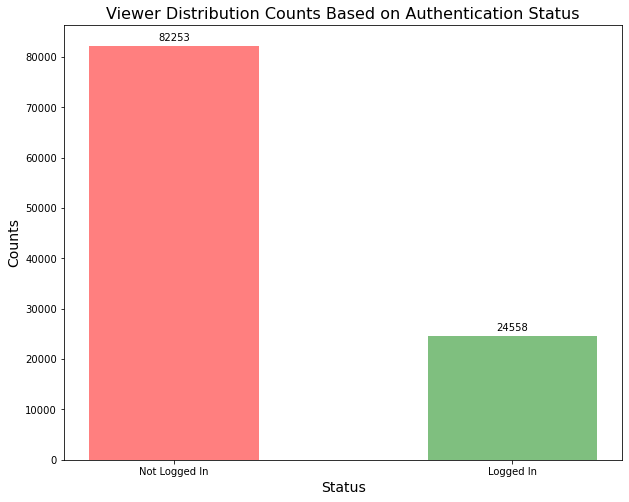

In [13]:
# number of users who were logged in to watch plays in the dataset
df_login = df[['is_login']].value_counts()
df_login = pd.pivot_table(df_login.to_frame(), values=0, index=[False, True], aggfunc=np.sum)
df_login = df_login.reset_index()
df_login  = df_login.rename(columns={'index':'is_login', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(2)
width = 0.5
bar = ax.bar(x, df_login['Counts'], color=['red', 'green'], alpha=.5, width=width)

ax.set_title('Viewer Distribution Counts Based on Authentication Status', fontsize=16)
ax.set_xlabel('Status', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['Not Logged In', 'Logged In'])

autolabel(bar)

plt.show()

Key Points:
- Most viewers were not logged in at the time they watched the videos
- The proportion between 'Not logged in' users and 'Logged in' users is approximately 4:1

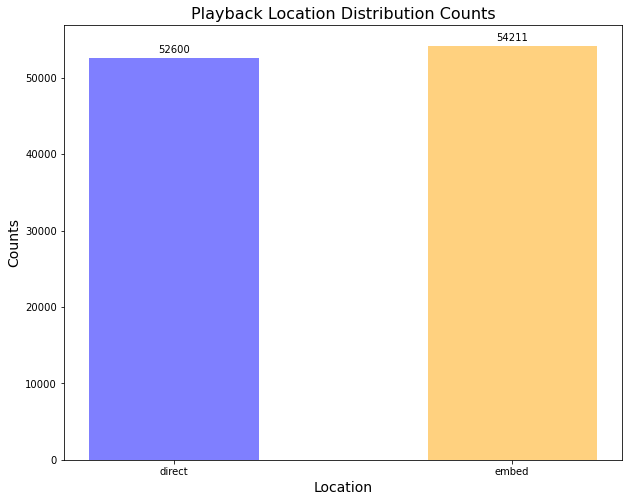

In [14]:
# playback locations
PLAYBACK = df['playback_location'].unique()
df_playback = df[['playback_location']].value_counts()
df_playback = pd.pivot_table(df_playback.to_frame(), values=0, index=PLAYBACK, aggfunc=np.sum)
df_playback = df_playback.reset_index()
df_playback  = df_playback.rename(columns={'index':'playback_location', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(2)
width = 0.5
bar = ax.bar(x, df_playback['Counts'], color=['blue', 'orange'], alpha=.5, width=width)

ax.set_title('Playback Location Distribution Counts', fontsize=16)
ax.set_xlabel('Location', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['direct', 'embed'])

autolabel(bar)

plt.show()

Key Points:
- Most user watched from embedded links
- Despite the slight gap in the number, surprisingly, there are still some user who visitted/watched direclty through Vidio app/website

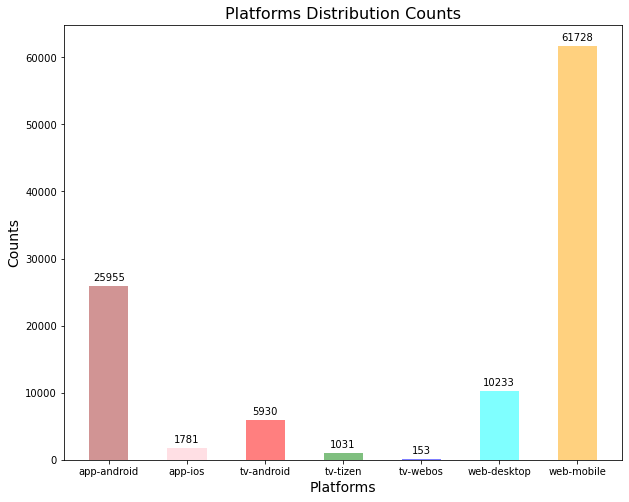

In [15]:
# platforms
PLATFORMS = df['platform'].unique()
df_platform = df[['platform']].value_counts()
df_platform = pd.pivot_table(df_platform.to_frame(), values=0, index=['platform'], aggfunc=np.sum)
df_platform = df_platform.reset_index()
df_platform  = df_platform.rename(columns={'index':'platform', 0: 'Counts'})

df_platform = df_platform.sort_values(by='platform')

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PLATFORMS))
width = 0.5
bar = ax.bar(x, df_platform['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Platforms Distribution Counts', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_platform['platform'].unique())

autolabel(bar)

plt.show()

Key Points:
- Most user prefer to watch from their phones, especially with mobile-based browsers

In [16]:
from urllib.parse import urlparse

# get referrer
non_link_referrer = {} # non-link
link_referrer = {} # link

for r in df['referrer']:
    if '/' not in str(r):
        if r not in non_link_referrer:
            non_link_referrer[str(r)] = 1
        else:
            non_link_referrer[str(r)] += 1
    else:
        domain = urlparse(r).netloc
        if domain not in link_referrer:
            link_referrer[domain] = 1
        else:
            link_referrer[domain] += 1

> Note: If we look at the column headers descriptions, actually, there is a column header `referrer_group` which also holds similar information. The difference is, in the `referrer` column, we can also look into different types of referrer other than links/urls.

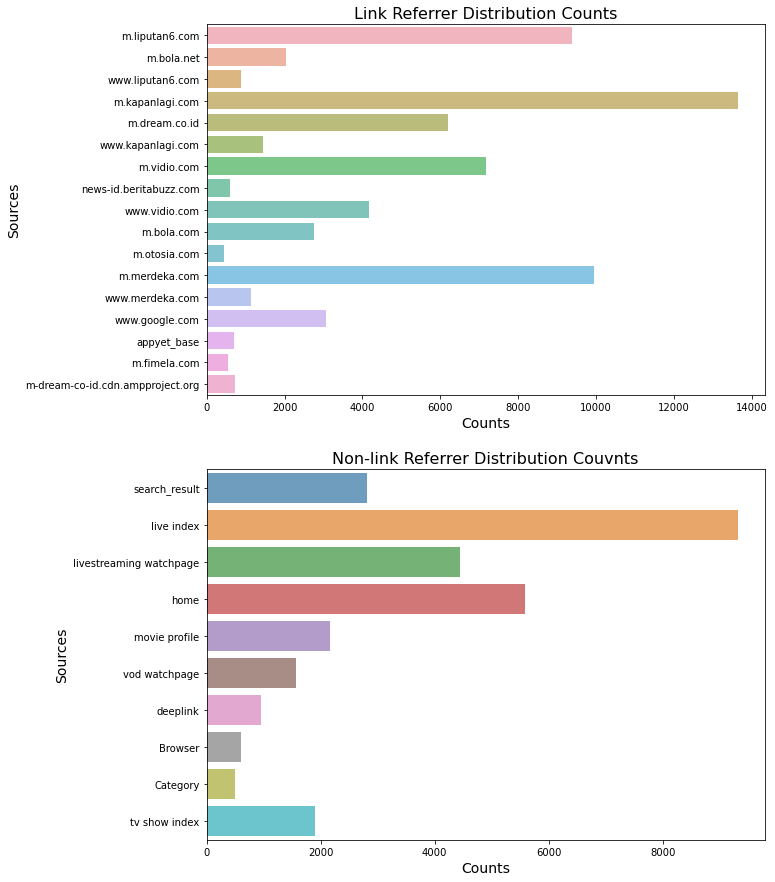

In [17]:
# plot referrer
link_mean = 0
for k, v in link_referrer.items():
    link_mean += v
link_mean = link_mean / len(link_referrer)

df_link_referrer = pd.DataFrame.from_dict(link_referrer, columns=['Counts'], orient='index')
df_link_referrer = df_link_referrer.reset_index()
df_link_referrer = df_link_referrer[df_link_referrer['Counts'] > link_mean]

non_link_mean = 0
for k, v in non_link_referrer.items():
    non_link_mean += v
non_link_mean = non_link_mean / len(non_link_referrer)

df_non_link_referrer = pd.DataFrame.from_dict(non_link_referrer, columns=['Counts'], orient='index')
df_non_link_referrer = df_non_link_referrer.reset_index()
df_non_link_referrer = df_non_link_referrer[df_non_link_referrer['Counts'] > non_link_mean]

fig, ax = plt.subplots(2, 1, figsize=(10,15))

sns.barplot(data=df_link_referrer, x='Counts', y='index', alpha=.7, ax=ax[0])
ax[0].set_title('Link Referrer Distribution Counts', fontsize=16)
ax[0].set_yticklabels(labels=df_link_referrer[df_link_referrer['Counts']>link_mean]['index'])
ax[0].set_ylabel('Sources', fontsize=14)
ax[0].set_xlabel('Counts', fontsize=14)

sns.barplot(data=df_non_link_referrer, x='Counts', y='index', alpha=.7, ax=ax[1])
ax[1].set_title('Non-link Referrer Distribution Couvnts', fontsize=16)
ax[1].set_yticklabels(labels=df_non_link_referrer[df_non_link_referrer['Counts']>non_link_mean]['index'])
ax[1].set_ylabel('Sources', fontsize=14)
ax[1].set_xlabel('Counts', fontsize=14)

plt.show()

Key Points:
- The 3 main referrer links from websites are: kapanlagi.com, liputan6.com, and merdeka.com. We can also see other popular sites like fimela.com, bola.net, etc.
- Live index has the most influence on non-link referrers followed by livestreaming watchpage and home page

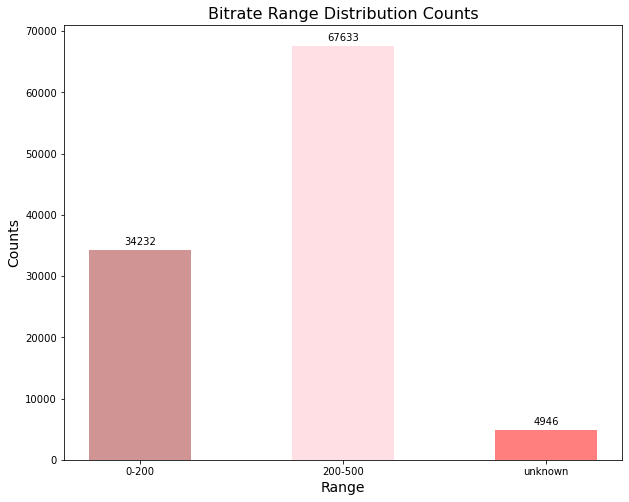

In [18]:
# bitrate range
BITRANGE = df['bitrate_range'].unique()
df_bitrange= df[['bitrate_range']].value_counts()
df_bitrange = pd.pivot_table(df_bitrange.to_frame(), values=0, index=BITRANGE, aggfunc=np.sum)
df_bitrange = df_bitrange.reset_index()
df_bitrange  = df_bitrange.rename(columns={'index':'bitrate_range', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(BITRANGE))
width = 0.5
bar = ax.bar(x, df_bitrange['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Bitrate Range Distribution Counts', fontsize=16)
ax.set_xlabel('Range', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['0-200', '200-500', 'unknown'])

autolabel(bar)

plt.show()

Key Points:
- Most user set their bitrate range to 200-500 to achieve higher resolutions

Average: 628411246.7934535


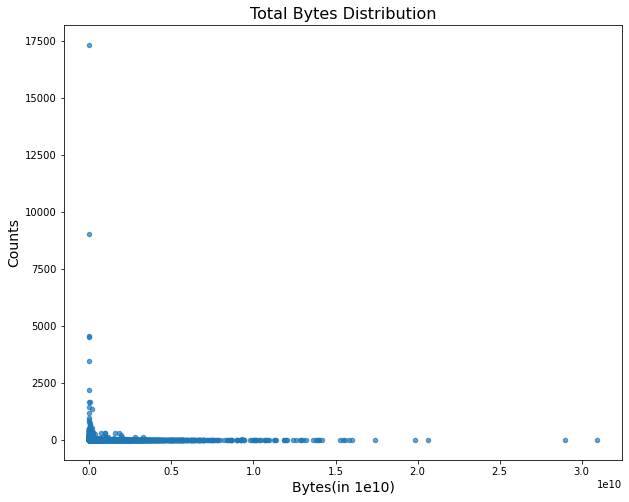

In [19]:
# total bytes
BYTES = df['total_bytes'].unique()
df_bytes= df[['total_bytes']].value_counts()
df_bytes = pd.pivot_table(df_bytes.to_frame(), values=0, index=BYTES, aggfunc=np.sum)
df_bytes = df_bytes.reset_index()
df_bytes  = df_bytes.rename(columns={'index':'total_bytes', 0: 'Counts'})

print('Average:', df_bytes['total_bytes'].mean())
df_bytes.plot(kind='scatter', x='total_bytes', y='Counts', figsize=(10,8), alpha=.7)
plt.title('Total Bytes Distribution', fontsize=16)
plt.xlabel('Bytes(in 1e10)', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()

Key Points:
- Average total bytes: 628,411,246.7934535 bytes
- Most data is clustered towards 0.0<sup>10</sup> to 1.0<sup>10</sup> bytes

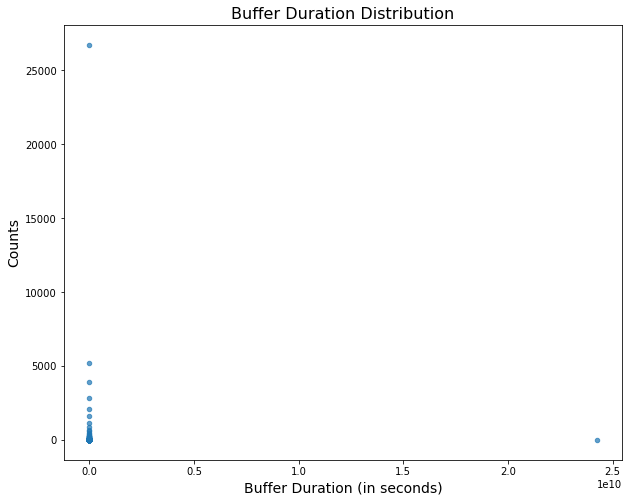

In [20]:
# buffer duration
BUFFER_DURATION = df['buffer_duration'].unique()
df_buffer_duration= df[['buffer_duration']].value_counts()
df_buffer_duration = pd.pivot_table(df_buffer_duration.to_frame(), values=0, index=BUFFER_DURATION, aggfunc=np.sum)
df_buffer_duration = df_buffer_duration.reset_index()
df_buffer_duration  = df_buffer_duration.rename(columns={'index':'buffer_duration', 0: 'Counts'})

df_buffer_duration.plot(kind='scatter', x='buffer_duration', y='Counts', figsize=(10,8), alpha=.7)
plt.title('Buffer Duration Distribution', fontsize=16)
plt.xlabel('Buffer Duration (in seconds)', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()

Key Points:
- Most people did not experience or experience a slight buffer while watching.
- There is a potential outlier (2.0 s buffer duration) in the data 

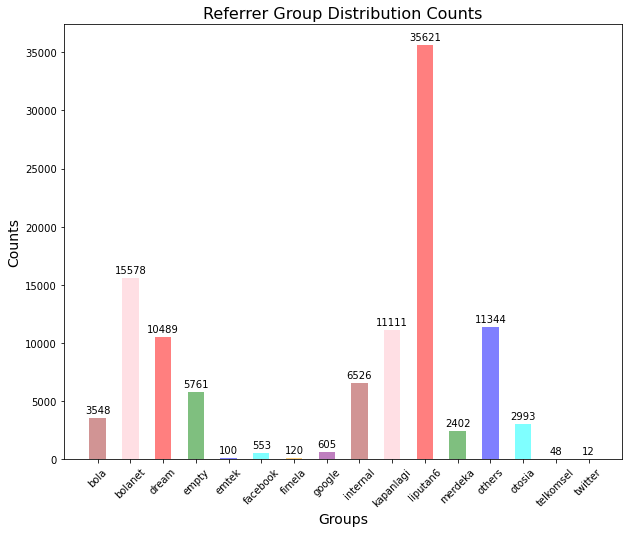

In [21]:
# referrer group
GROUP = df['referrer_group'].unique()
df_refgroup = df[['referrer_group']].value_counts()
df_refgroup = pd.pivot_table(df_refgroup.to_frame(), values=0, index=GROUP, aggfunc=np.sum)
df_refgroup = df_refgroup.reset_index()
df_refgroup  = df_refgroup.rename(columns={'index':'referrer_group', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(GROUP))
width = 0.5
bar = ax.bar(x, df_refgroup['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Referrer Group Distribution Counts', fontsize=16)
ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_refgroup['referrer_group'], rotation=45)

autolabel(bar)

plt.show()

Key Points:
- Now when we look at the referrer groups (there is a slight difference between the `referrer` and `referrer_groups` column), most viewers came from 'liputan6', 'bolanet', and 'kapanlagi' websites.
- Previously, we saw these referrers in form of links. Here, those links have been grouped into their corresponding groups. Thus, making it easier for analysis and decision making.

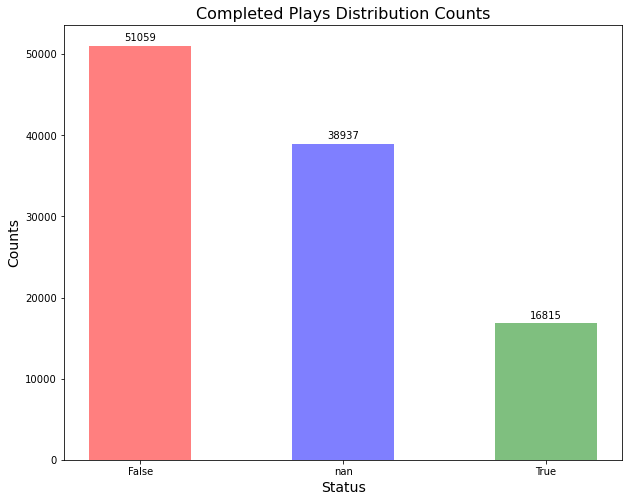

In [22]:
# completed
COMPLETED = df['completed'].unique()
COMPLETED[-1] = 'Not Specified'
df_completed = df['completed'].value_counts(dropna=False)
df_completed = df_completed.reset_index()
df_completed  = df_completed.rename(columns={'index':'completed', 'completed': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(COMPLETED))
width = 0.5
bar = ax.bar(x, df_completed['Counts'], color=['red', 'blue', 'green'], alpha=.5, width=width)

ax.set_title('Completed Plays Distribution Counts', fontsize=16)
ax.set_xlabel('Status', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_completed['completed'])

autolabel(bar)

plt.show()

Key Points:
- Most plays (I assume that the term 'completed plays' include: films, dramas, cartoons, and other series) are not completed yet.
- Around 38000 plays have unknown status

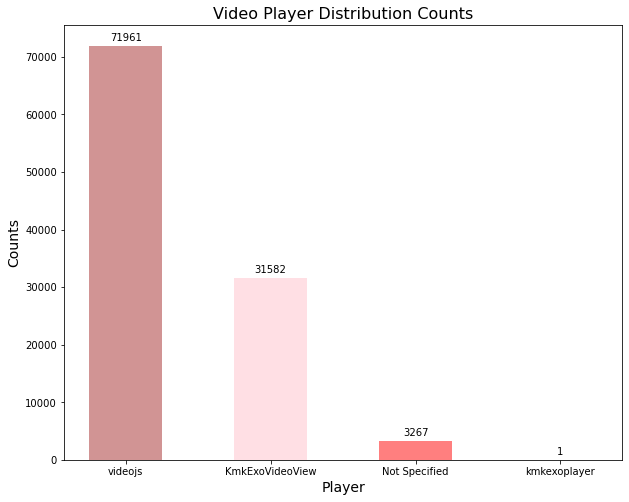

In [23]:
# player name
PLAYER = df['player_name'].unique()
PLAYER[2] = 'Not Specified'
df_player = df['player_name'].value_counts(dropna=False)
df_player = df_player.to_frame().reset_index()
df_player  = df_player.rename(columns={'index':'player', 'player_name': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PLAYER))
width = 0.5
bar = ax.bar(x, df_player['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Video Player Distribution Counts', fontsize=16)
ax.set_xlabel('Player', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(PLAYER)

autolabel(bar)

plt.show()

Key Points:
- Most plays used Videojs for their players (Videojs is probably the most used open-source video player around the world).
- I have not heard of any of these players other than Videojs and I cannot seem to find any information or background about 'KMK Exo Video View' 'KMK Exo Player'.
- The only way to measure the performances between them is to analyse the buffer duration.

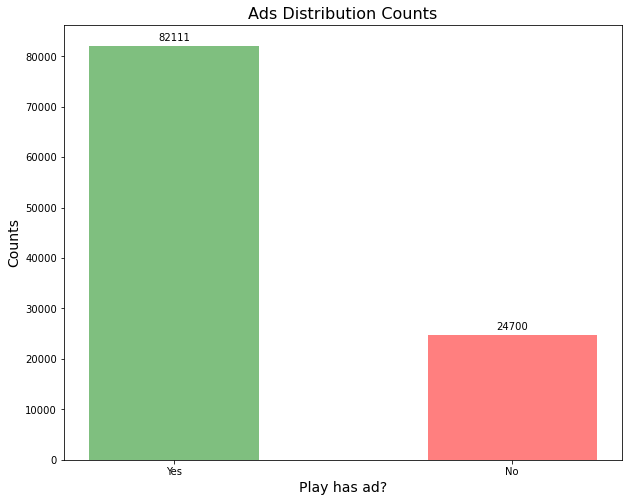

In [24]:
# ads
AD = df['has_ad'].unique()
df_ad = df['has_ad'].value_counts()
df_ad = df_ad.to_frame().reset_index()
df_ad  = df_ad.rename(columns={'index':'has_ad', 'has_ad': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(AD))
width = 0.5
bar = ax.bar(x, df_ad['Counts'], color=['green', 'red'], alpha=.5, width=width)

ax.set_title('Ads Distribution Counts', fontsize=16)
ax.set_xlabel('Play has ad?', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['Yes', 'No'])

autolabel(bar)

plt.show()

Key Points:
- Most videos/plays have ads (I assume that this is similar to Youtube ads where they can appear anywhere between the play duration)
- Apparently, in general, there are 3 types of ads: TrueView (skippable), Preroll (non-skippable), and Bumper. (https://blog.hubspot.com/marketing/youtube-video-advertising-guide)

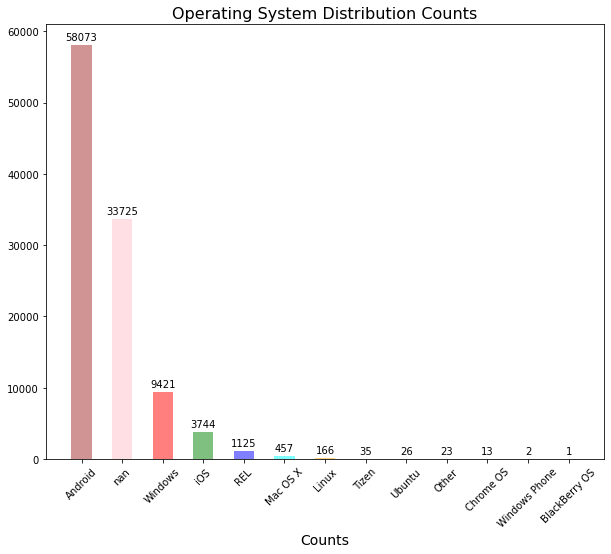

In [25]:
# os name
OS = df['os_name'].unique()
df_os = df['os_name'].value_counts(dropna=False)
df_os = df_os.to_frame().reset_index()
df_os  = df_os.rename(columns={'index':'os_name', 'os_name': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(OS))
width = 0.5
bar = ax.bar(x, df_os['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Operating System Distribution Counts', fontsize=16)
ax.set_xlabel('OS', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_os['os_name'], rotation=45)

autolabel(bar)

plt.show()

Key Points:
- Most viewers watch on Android OS
- This result corresponds to the previous result "Platform Distribution Counts" where the number of viewers watching through 'web_mobile' is the highest

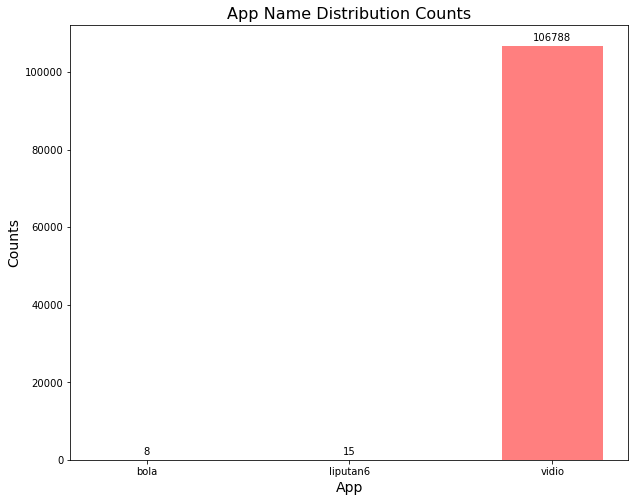

In [26]:
# app name
APP = df['app_name'].unique()
df_appname = df[['app_name']].value_counts()
df_appname = pd.pivot_table(df_appname.to_frame(), values=0, index=APP, aggfunc=np.sum)
df_appname = df_appname.reset_index()
df_appname  = df_appname.rename(columns={'index':'app_name', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(APP))
width = 0.5
bar = ax.bar(x, df_appname['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('App Name Distribution Counts', fontsize=16)
ax.set_xlabel('App', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_appname['app_name'])

autolabel(bar)

plt.show()

Key Points:
- Assuming that several user is watching through an app, then the Vidio app itself contributes to the most viewer counts

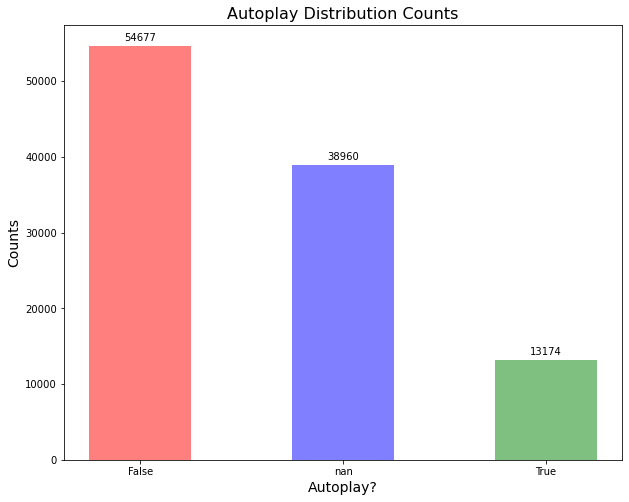

In [27]:
# autoplay
AUTO = df['autoplay'].unique()
df_auto = df['autoplay'].value_counts(dropna=False)
df_auto = df_auto.to_frame().reset_index()
df_auto  = df_auto.rename(columns={'index':'autoplay', 'autoplay': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(AUTO))
width = 0.5
bar = ax.bar(x, df_auto['Counts'], color=['red','blue', 'green', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Autoplay Distribution Counts', fontsize=16)
ax.set_xlabel('Autoplay?', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_auto['autoplay'])

autolabel(bar)

plt.show()

Key Points:
- Most user do not enable the autoplay feature

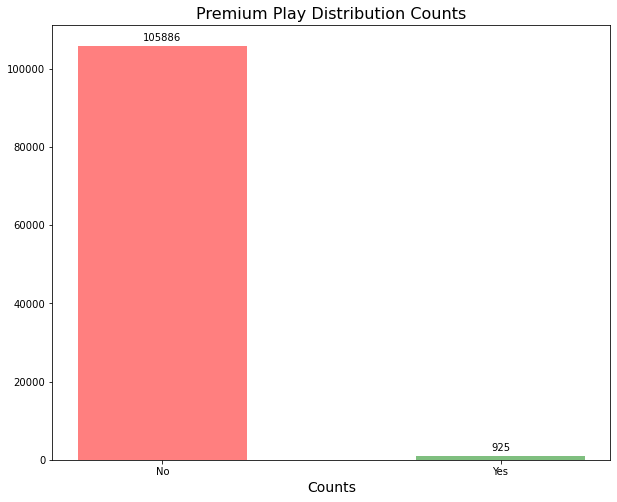

In [28]:
# premium
PREMIUM = df['is_premium'].unique()
df_premium = df[['is_premium']].value_counts()
df_premium = pd.pivot_table(df_premium.to_frame(), values=0, index=PREMIUM, aggfunc=np.sum)
df_premium = df_premium.reset_index()
df_premium  = df_premium.rename(columns={'index':'is_premium', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PREMIUM))
width = 0.5
bar = ax.bar(x, df_premium['Counts'], color=['red','green', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Premium Play Distribution Counts', fontsize=16)
ax.set_xlabel('Premium?', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['No', 'Yes'])

autolabel(bar)

plt.show()

Key Points:
- Surprisingly, not many videos/plays are set to "premium" content

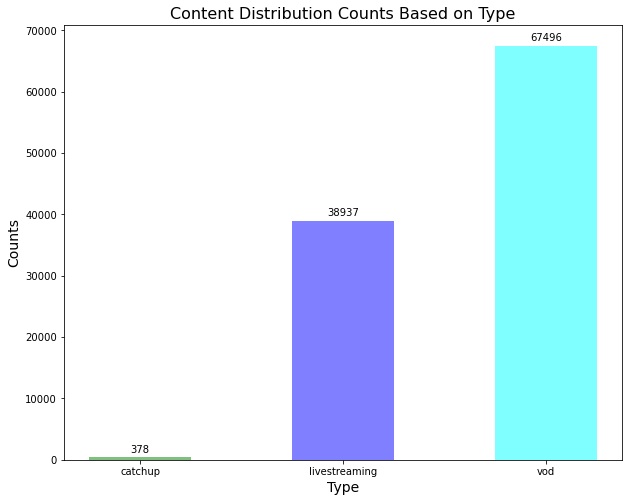

In [29]:
# content type
CONTENT = df['content_type'].unique()
df_content = df[['content_type']].value_counts()
df_content = pd.pivot_table(df_content.to_frame(), values=0, index=CONTENT, aggfunc=np.sum)
df_content = df_content.reset_index()
df_content  = df_content.rename(columns={'index':'content_type', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(CONTENT))
width = 0.5
bar = ax.bar(x, df_content['Counts'], color=['green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Content Distribution Counts Based on Type', fontsize=16)
ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_content['content_type'])

autolabel(bar)

plt.show()

Key Points:
- VODs (Video on Demand) are the most popular type of video content that people like (almost doubled the number from livestreaming).

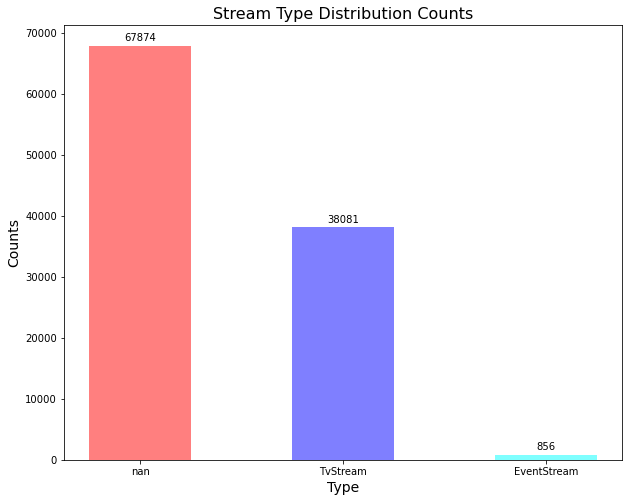

In [30]:
# stream type
STREAM = df['stream_type'].unique()
STREAM[0] = 'Not Specified'
df_stream = df['stream_type'].value_counts(dropna=False)
df_stream = df_stream.to_frame().reset_index()
df_stream  = df_stream.rename(columns={'index':'stream_type', 'stream_type': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(AUTO))
width = 0.5
bar = ax.bar(x, df_stream['Counts'], color=['red', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Stream Type Distribution Counts', fontsize=16)
ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_stream['stream_type'])

autolabel(bar)

plt.show()

Key Points:
- 'NaN' values here indicate that the videos do not contain 'livestreaming' content.
- If they contain livestreaming content, then 'TV Stream' is the most popular stream type

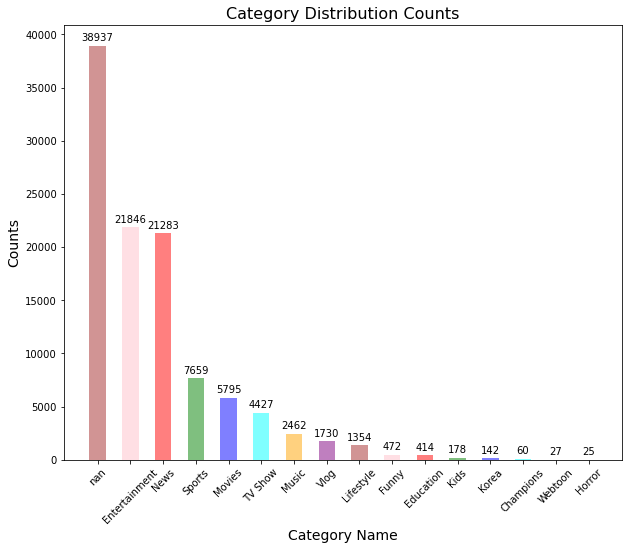

In [31]:
# category name
CATEGORY = df['category_name'].unique()
CATEGORY[4] = 'Not Specified'
df_category = df['category_name'].value_counts(dropna=False)
df_category = df_category.to_frame().reset_index()
df_category  = df_category.rename(columns={'index':'category_name', 'category_name': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(CATEGORY))
width = 0.5
bar = ax.bar(x, df_category['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Category Distribution Counts', fontsize=16)
ax.set_xlabel('Category Name', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_category['category_name'], rotation=45)

autolabel(bar)

plt.show()

Key Points:
- Most videos/plays do not specify their categories
- Indonesians love watching 'Entertainment' and 'News', followed by 'Sports' and 'Movies' category.

## Feature Engineering

> Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.<br>
-Wikipedia (https://en.wikipedia.org/wiki/Feature_engineering#:~:text=Feature%20engineering%20is%20the%20process,as%20applied%20machine%20learning%20itself)

I will explain how I applied feature engineering in this project. Notice that there exist two columns: `play_time` and `end_time` indicating when the play starts and ends respectively. From both of them, I can build a new feature called `duration` which indicates the run time for each movie/play.

<b> Note: I realized later that there is a column named `play_duration` which contains exactly the same information I got from this feature engineering step. Nevertheless, I think that feature engineering step itself is essential in every data science project.</b>

In [32]:
import dateutil.parser

start = df['play_time'] # play start time
end = df['end_time'] # play end time

# create a new feature called 'duration' and append a column to our original dataframe
duration = []
for s, e in zip(start, end):
    diff = dateutil.parser.parse(e) - dateutil.parser.parse(s)
    duration.append(diff.seconds)

df['duration'] = duration

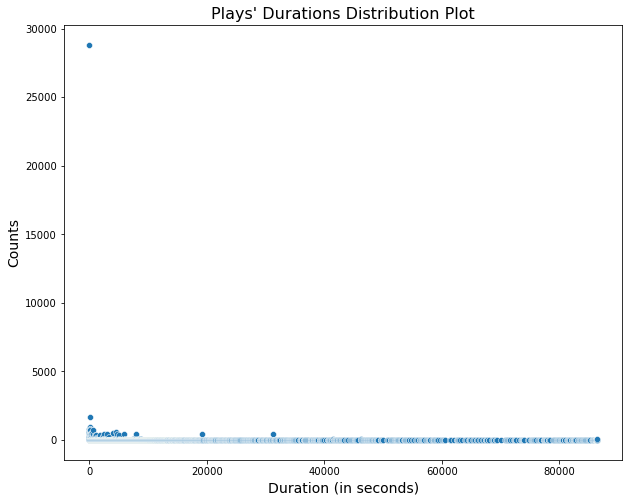

In [33]:
# duration distribution plot
DURATION = df['duration'].unique()
df_duration = df[['duration']].value_counts()
df_duration = pd.pivot_table(df_duration.to_frame(), values=0, index=DURATION, aggfunc=np.sum)
df_duration = df_duration.reset_index()
df_duration  = df_duration.rename(columns={'index':'duration', 0: 'Counts'})

plt.figure(figsize=(10,8))
plt.title("Plays' Durations Distribution Plot", fontsize=16)
sns.scatterplot(data=df_duration, x='duration', y='Counts')
plt.xlabel('Duration (in seconds)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

Key Points:
- It seems like most of the data clusters towards movies/plays that are less than 10000 seconds.
- Surprisingly, there exists plays/movies with duration >= 80000 seconds (~22 hours). We will see this in the next part of the analysis to tell which kinds of movies/plays with ~22 hours of play time.

## Bivariate Analysis
In the previous parts, we have seen univariate analysis which only utilizes one feature at a time. Now, we can see relationships between 2 features to analyse the correlation. Again, I will only provide the key points of the results instead of discussing the whole analysis in details.

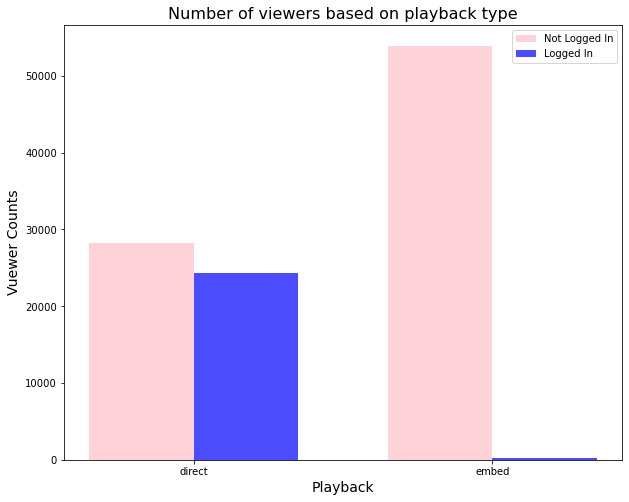

In [34]:
# number of viewers based on login status and playback location
df_login_playback = df[['is_login', 'playback_location']].value_counts()
df_login_playback = pd.pivot_table(df_login_playback.to_frame(), values=0, index=['is_login', 'playback_location'], aggfunc=np.sum)
df_login_playback = df_login_playback.reset_index()
df_login_playback = df_login_playback.rename(columns={0: 'Counts'})

df_login_playback = df_login_playback.sort_values(by=['playback_location'])

x = np.arange(len(PLAYBACK))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_playback[df_login_playback['is_login'] == 0]['Counts'], width, label='Not Logged In', color='pink', alpha=.7)
ax.bar(x + width/2, df_login_playback[df_login_playback['is_login'] == 1]['Counts'], width, label='Logged In', color='blue', alpha=.7)

ax.set_title('Number of viewers based on playback type', fontsize=16)
ax.set_ylabel('Vuewer Counts', fontsize=14)
ax.set_xlabel('Playback', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_playback['playback_location'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Direct plays/movies have more logged in user
- The number of user that were not logged in surpasses logged in user

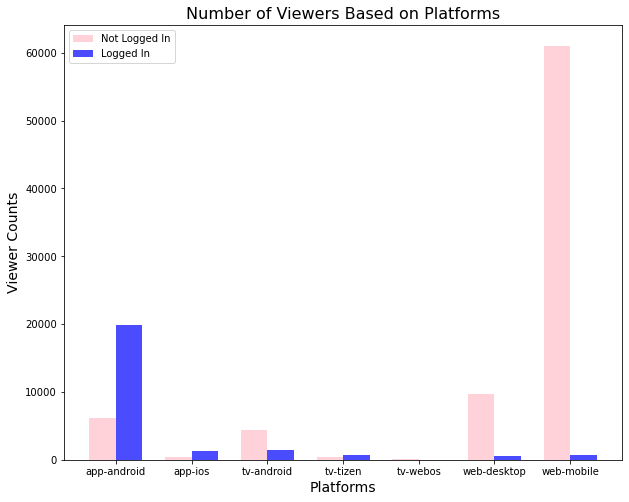

In [35]:
# number of viewers based on login status and platform
df_login_platform = df[['is_login', 'platform']].value_counts()
df_login_platform = pd.pivot_table(df_login_platform.to_frame(), values=0, index=['is_login', 'platform'], aggfunc=np.sum)
df_login_platform = df_login_platform.reset_index()
df_login_platform = df_login_platform.rename(columns={0: 'Counts'})

df_login_platform = df_login_platform.sort_values(by=['platform'])

x = np.arange(len(PLATFORMS))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_platform[df_login_platform['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_platform[df_login_platform['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Platforms', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_platform['platform'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Most user comes from web browsers in their phones and desktops (PCs, laptops, etc.)
- Logged in user mostly uses Vidio app installed in their phones (Android & iOS)
- We can also see small circle of user watching from TVs (Android TV, Samsung Tizen, and LG WebOS)

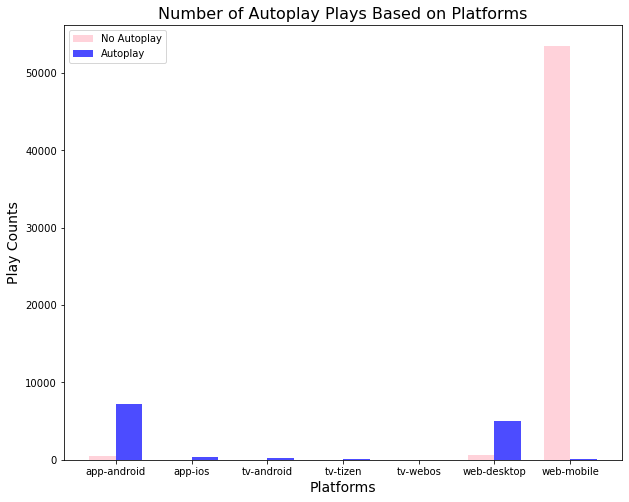

In [43]:
df_platform_autoplay = df[['autoplay', 'platform']].value_counts()
df_platform_autoplay = pd.pivot_table(df_platform_autoplay.to_frame(), values=0, index=['autoplay', 'platform'], aggfunc=np.sum)
df_platform_autoplay = df_platform_autoplay.reset_index()
df_platform_autoplay = df_platform_autoplay.rename(columns={0: 'Counts'})

i = len(df_platform_autoplay)
for cat in df_platform_autoplay[df_platform_autoplay['autoplay'] == 0]['platform'].tolist():
    if cat not in df_platform_autoplay[df_platform_autoplay['autoplay'] == 1]['platform'].tolist():
        df_platform_autoplay.loc[i] = [True, cat, 0]
        i += 1

for cat in df_platform_autoplay[df_platform_autoplay['autoplay'] == 1]['platform'].tolist():
    if cat not in df_platform_autoplay[df_platform_autoplay['autoplay'] == 0]['platform'].tolist():
        df_platform_autoplay.loc[i] = [False, cat, 0]
        i += 1

df_platform_autoplay = df_platform_autoplay.sort_values(by=['platform'])

x = np.arange(len(df_platform_autoplay['platform'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_platform_autoplay[df_platform_autoplay['autoplay'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_platform_autoplay[df_platform_autoplay['autoplay'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Autoplay Plays Based on Platforms', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_platform_autoplay['platform'].unique())
ax.legend(['No Autoplay', 'Autoplay'])

plt.show()

Key Points:
- Web mobile user mostly disable the autoplay feature (probably to save mobile data package unlike web desktops which use wifi and ethernet cables)
- In contrast, the android app user mostly enable the autoplay feature 

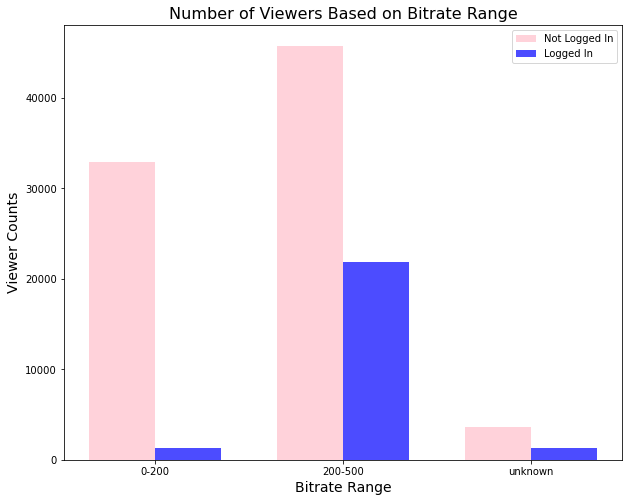

In [45]:
# number of viewers based on login status and bitrate range
df_login_bitrange = df[['is_login', 'bitrate_range']].value_counts()
df_login_bitrange = pd.pivot_table(df_login_bitrange.to_frame(), values=0, index=['is_login', 'bitrate_range'], aggfunc=np.sum)
df_login_bitrange = df_login_bitrange.reset_index()
df_login_bitrange = df_login_bitrange.rename(columns={0: 'Counts'})

df_login_bitrange = df_login_bitrange.sort_values(by='bitrate_range')

x = np.arange(len(BITRANGE))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_bitrange[df_login_bitrange['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_bitrange[df_login_bitrange['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Bitrate Range', fontsize=16)
ax.set_xlabel('Bitrate Range', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_bitrange['bitrate_range'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Even for both not logged in and logged in users, they still prefer 200-500 bitrate range.

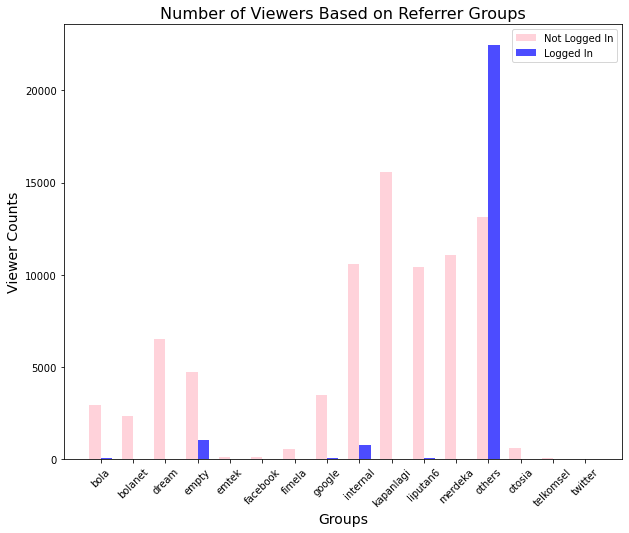

In [48]:
# number of viewers based on login status and referrer groups
df_login_refgroup = df[['is_login', 'referrer_group']].value_counts()
df_login_refgroup = pd.pivot_table(df_login_refgroup.to_frame(), values=0, index=['is_login', 'referrer_group'], aggfunc=np.sum)
df_login_refgroup = df_login_refgroup.reset_index()
df_login_refgroup = df_login_refgroup.rename(columns={0: 'Counts'})

i = len(df_login_refgroup)
for ref in df_login_refgroup[df_login_refgroup['is_login'] == 0]['referrer_group'].tolist():
    if ref not in df_login_refgroup[df_login_refgroup['is_login'] == 1]['referrer_group'].tolist():
        row = pd.DataFrame([True, ref, 0])
        df_login_refgroup.loc[i] = [True, ref, 0]
        i += 1

df_login_refgroup = df_login_refgroup.sort_values(by=['referrer_group'])

x = np.arange(len(GROUP))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_refgroup[df_login_refgroup['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_refgroup[df_login_refgroup['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Referrer Groups', fontsize=16)
ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_refgroup['referrer_group'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Now we see something odd here. 'others' referrer groups has the most logged in users compared to other referrer groups. Since I do not have an access to analyse this in detail, I cannot comprehend what does 'others' refer to.

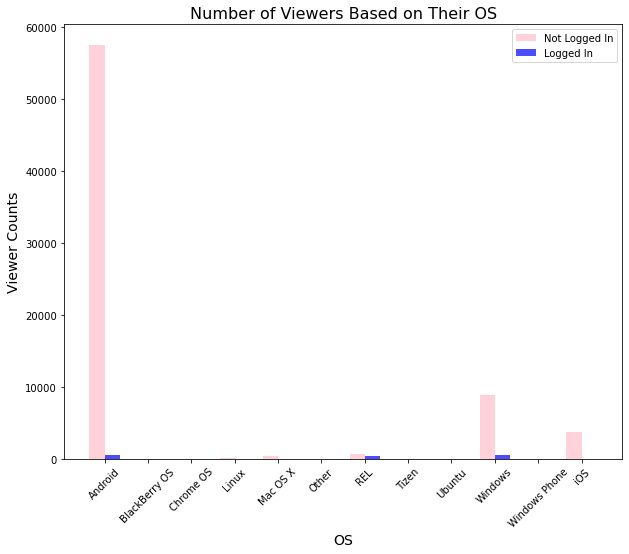

In [49]:
# number of viewers based on login status and operating system (os)
df_login_os = df[['is_login', 'os_name']].value_counts()
df_login_os = pd.pivot_table(df_login_os.to_frame(), values=0, index=['is_login', 'os_name'], aggfunc=np.sum)
df_login_os = df_login_os.reset_index()
df_login_os = df_login_os.rename(columns={0: 'Counts'})

i = len(df_login_os)
for os in df_login_os[df_login_os['is_login'] == 0]['os_name'].tolist():
    if os not in df_login_os[df_login_os['is_login'] == 1]['os_name'].tolist():
        df_login_os.loc[i] = [True, os, 0]
        i += 1

df_login_os = df_login_os.sort_values(by=['os_name'])

new_OS = np.delete(OS, 4)
x = np.arange(len(new_OS))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_os[df_login_os['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_os[df_login_os['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Their OS', fontsize=16)
ax.set_xlabel('OS', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_os['os_name'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Phone users (Android & iOS) dominates the OS group
- Surprisingly, there are still some user using the BlackBerry OS

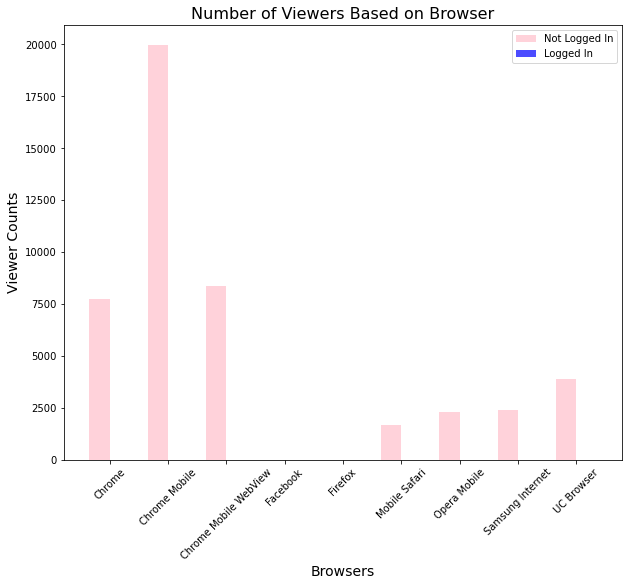

In [50]:
# number of viewers based on login status and browser
df_login_browser = df[['is_login', 'browser_name']].value_counts()
df_login_browser = pd.pivot_table(df_login_browser.to_frame(), values=0, index=['is_login', 'browser_name'], aggfunc=np.sum)
df_login_browser = df_login_browser.reset_index()
df_login_browser = df_login_browser.rename(columns={0: 'Counts'})
df_login_browser = df_login_browser[df_login_browser['Counts'] >= df_login_browser['Counts'].mean()]

i = len(df_login_browser)
for browser in df_login_browser[df_login_browser['is_login'] == 0]['browser_name'].tolist():
    if browser not in df_login_browser[df_login_browser['is_login'] == 1]['browser_name'].tolist():
        df_login_browser.loc[i] = [True, browser, 0]
        i += 1

for browser in df_login_browser[df_login_browser['is_login'] == 1]['browser_name'].tolist():
    if browser not in df_login_browser[df_login_browser['is_login'] == 0]['browser_name'].tolist():
        df_login_browser.loc[i] = [False, browser, 0]
        i += 1
        
df_login_browser = df_login_browser.sort_values(by=['browser_name'])

x = np.arange(len(df_login_browser['browser_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_browser[df_login_browser['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_browser[df_login_browser['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Browser', fontsize=16)
ax.set_xlabel('Browsers', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_browser['browser_name'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- This part of analysis is only for web browser users.
- Google Chrome (desktop & mobile) still holds the title of the most used browsers.
- UC Browser follows behind, surpasses Safari and Opera (this is probably because UC Browser is very popular in both China and Indonesia)

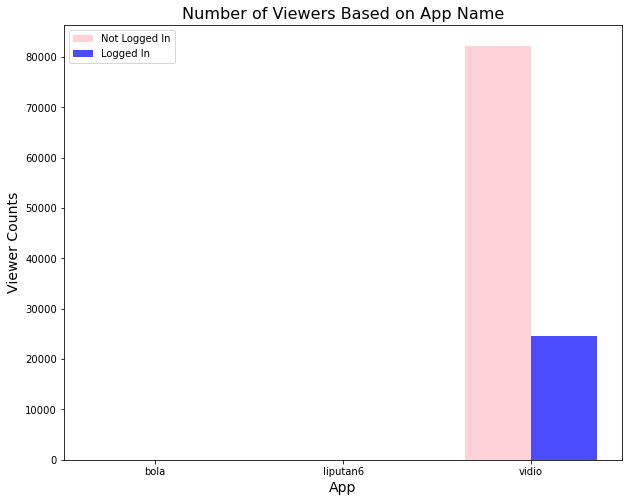

In [51]:
# number of viewers based on login status and app name
df_login_app = df[['is_login', 'app_name']].value_counts()
df_login_app = pd.pivot_table(df_login_app.to_frame(), values=0, index=['is_login', 'app_name'], aggfunc=np.sum)
df_login_app = df_login_app.reset_index()
df_login_app = df_login_app.rename(columns={0: 'Counts'})
df_login_app = df_login_app.sort_values(by=['app_name'])

i = len(df_login_app)
for app in df_login_app[df_login_app['is_login'] == 0]['app_name'].tolist():
    if app not in df_login_app[df_login_app['is_login'] == 1]['app_name'].tolist():
        df_login_app.loc[i] = [True, app, 0]
        i += 1
        
for app in df_login_app[df_login_app['is_login'] == 1]['app_name'].tolist():
    if app not in df_login_app[df_login_app['is_login'] == 0]['app_name'].tolist():
        df_login_app.loc[i] = [False, app, 0]
        i += 1

df_login_app = df_login_app.sort_values(by=['app_name'])

x = np.arange(len(df_login_app['app_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_app[df_login_app['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_app[df_login_app['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on App Name', fontsize=16)
ax.set_xlabel('App', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_app['app_name'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Even with the Vidio app itself, not logged-in users still dominates over logged-in users

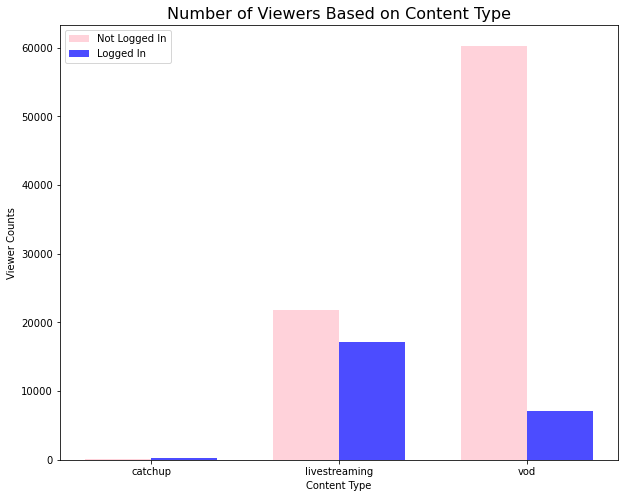

In [52]:
# number of viewers based on login status and content type
df_login_content = df[['is_login', 'content_type']].value_counts()
df_login_content = pd.pivot_table(df_login_content.to_frame(), values=0, index=['is_login', 'content_type'], aggfunc=np.sum)
df_login_content = df_login_content.reset_index()
df_login_content = df_login_content.rename(columns={0: 'Counts'})
        
df_login_content = df_login_content.sort_values(by=['content_type'])

x = np.arange(len(df_login_content['content_type'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_content[df_login_content['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_content[df_login_content['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Content Type', fontsize=16)
ax.set_xlabel('Content Type')
ax.set_ylabel('Viewer Counts')
ax.set_xticks(x)
ax.set_xticklabels(df_login_content['content_type'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- There is an interesting point here: many logged-in users watch live streaming contents compared to VOD which is the main attraction for most users.

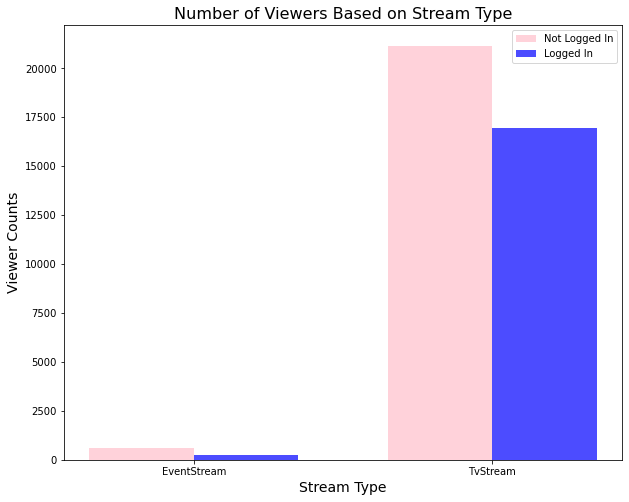

In [53]:
# number of viewers based on login status and stream type
df_login_stream = df[['is_login', 'stream_type']].value_counts()
df_login_stream = pd.pivot_table(df_login_stream.to_frame(), values=0, index=['is_login', 'stream_type'], aggfunc=np.sum)
df_login_stream = df_login_stream.reset_index()
df_login_stream = df_login_stream.rename(columns={0: 'Counts'})
        
df_login_stream = df_login_stream.sort_values(by=['stream_type'])

x = np.arange(len(df_login_stream['stream_type'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_stream[df_login_stream['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_stream[df_login_stream['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Stream Type', fontsize=16)
ax.set_xlabel('Stream Type', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_stream['stream_type'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- TV streams attracts more viewers compared to event streams (this is probably due to the fact that there are many Indonesian local TV channels which often airs live stream e.g. football match, TV shows, etc.).

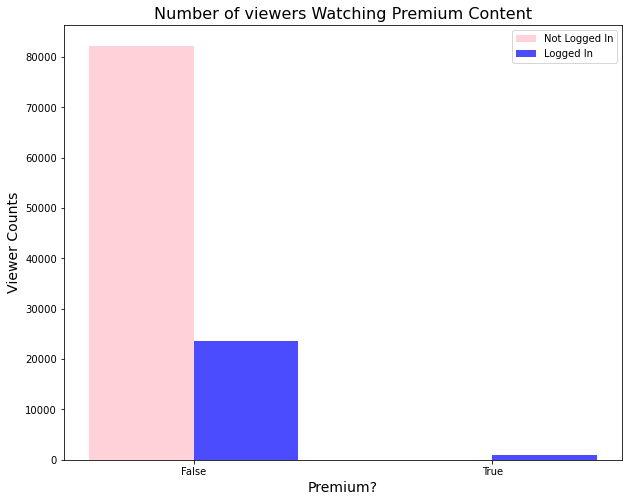

In [54]:
# number of viewers based on login status and premium
df_login_premium = df[['is_login', 'is_premium']].value_counts()
df_login_premium = pd.pivot_table(df_login_premium.to_frame(), values=0, index=['is_login', 'is_premium'], aggfunc=np.sum)
df_login_premium = df_login_premium.reset_index()
df_login_premium = df_login_premium.rename(columns={0: 'Counts'})
        
df_login_premium = df_login_premium.sort_values(by=['is_premium'])

x = np.arange(len(df_login_premium['is_premium'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_premium[df_login_premium['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_premium[df_login_premium['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of viewers Watching Premium Content', fontsize=16)
ax.set_xlabel('Premium?', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_premium['is_premium'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Most people are still reluctant to upgrade their accounts to premium accounts.
- We will see later in 'Multivariate Analysis' part to analyse what kind of users that are willing to upgrade.

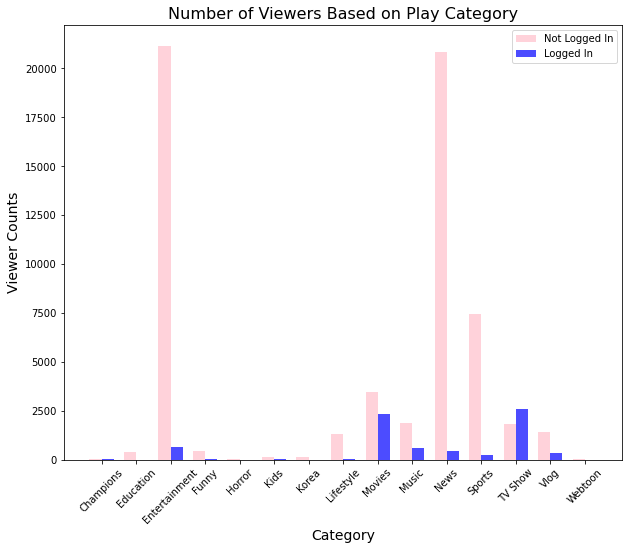

In [41]:
# number of viewers based on login status and play category
df_login_category = df[['is_login', 'category_name']].value_counts()
df_login_category = pd.pivot_table(df_login_category.to_frame(), values=0, index=['is_login', 'category_name'], aggfunc=np.sum)
df_login_category = df_login_category.reset_index()
df_login_category = df_login_category.rename(columns={0: 'Counts'})
        
df_login_category = df_login_category.sort_values(by=['category_name'])

x = np.arange(len(df_login_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_category[df_login_category['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_category[df_login_category['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Play Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_category['category_name'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Key Points:
- Most logged-in users enjoy watching TV shows and movies category.
- Most unlogged-in users watch news & entertainment (probably due to small play duration and hence, they do not need to log in)

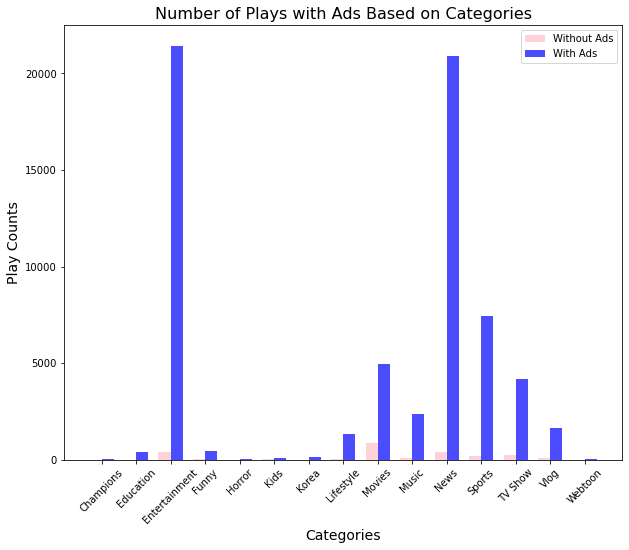

In [55]:
# number of plays that have ads based on category
df_ad_category = df[['has_ad', 'category_name']].value_counts()
df_ad_category = pd.pivot_table(df_ad_category.to_frame(), values=0, index=['has_ad', 'category_name'], aggfunc=np.sum)
df_ad_category = df_ad_category.reset_index()
df_ad_category = df_ad_category.rename(columns={0: 'Counts'})
        
df_ad_category = df_ad_category.sort_values(by=['category_name'])

x = np.arange(len(df_ad_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_ad_category[df_ad_category['has_ad'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_ad_category[df_ad_category['has_ad'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Plays with Ads Based on Categories', fontsize=16)
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_ad_category['category_name'].unique(), rotation=45)
ax.legend(['Without Ads', 'With Ads'])

plt.show()

Key Points:
- In accordance with the previous analysis above about 'Number of Viewers Based on Category', the number of ads in 'Entertainment', 'News', adn 'Sports' category are above average compared to the rest of the categories.
- The highest number of plays without ads can be found in the 'Movies' category

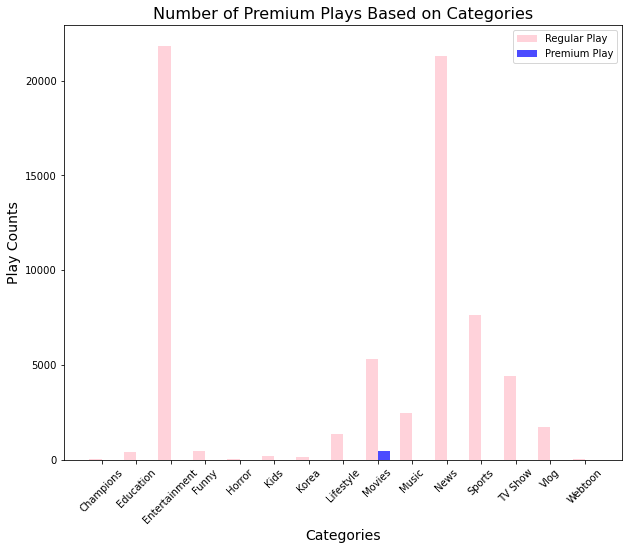

In [56]:
# number of plays that contains premium content based on category
df_premium_category = df[['is_premium', 'category_name']].value_counts()
df_premium_category = pd.pivot_table(df_premium_category.to_frame(), values=0, index=['is_premium', 'category_name'], aggfunc=np.sum)
df_premium_category = df_premium_category.reset_index()
df_premium_category = df_premium_category.rename(columns={0: 'Counts'})

i = len(df_premium_category)
for cat in df_premium_category[df_premium_category['is_premium'] == 0]['category_name'].tolist():
    if cat not in df_premium_category[df_premium_category['is_premium'] == 1]['category_name'].tolist():
        df_premium_category.loc[i] = [True, cat, 0]
        i += 1

for cat in df_premium_category[df_premium_category['is_premium'] == 1]['category_name'].tolist():
    if cat not in df_premium_category[df_premium_category['is_premium'] == 0]['category_name'].tolist():
        df_premium_category.loc[i] = [False, cat, 0]
        i += 1

df_premium_category = df_premium_category.sort_values(by=['category_name'])

x = np.arange(len(df_premium_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_premium_category[df_premium_category['is_premium'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_premium_category[df_premium_category['is_premium'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Premium Plays Based on Categories', fontsize=16)
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_premium_category['category_name'].unique(), rotation=45)
ax.legend(['Regular Play', 'Premium Play'])

plt.show()

Key Points:
- Premium plays/movies are significant on 'Movies' category only.

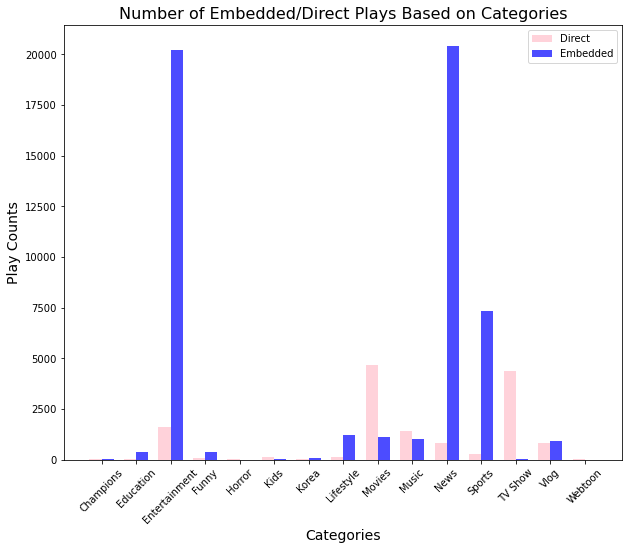

In [44]:
# number of plays that have ads based on category
df_playback_category = df[['playback_location', 'category_name']].value_counts()
df_playback_category = pd.pivot_table(df_playback_category.to_frame(), values=0, index=['playback_location', 'category_name'], aggfunc=np.sum)
df_playback_category = df_playback_category.reset_index()
df_playback_category = df_playback_category.rename(columns={0: 'Counts'})
        
df_playback_category = df_playback_category.sort_values(by=['category_name'])

i = len(df_playback_category)
for cat in df_playback_category[df_playback_category['playback_location'] == 'direct']['category_name'].tolist():
    if cat not in df_playback_category[df_playback_category['playback_location'] == 'embed']['category_name'].tolist():
        df_playback_category.loc[i] = ['embed', cat, 0]
        i += 1
        
x = np.arange(len(df_playback_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_playback_category[df_playback_category['playback_location'] == 'direct']['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_playback_category[df_playback_category['playback_location'] == 'embed']['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Embedded/Direct Plays Based on Categories', fontsize=16)
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_playback_category['category_name'].unique(), rotation=45)
ax.legend(['Direct', 'Embedded'])

plt.show()

Key Points:
- Embedded plays are mostly found on 'Entertainment' and 'News' category. This make sense because people who are reading blogs/news online can view the video embedded on that website without having them visit the Vidio website directly.
- On the other hand, people who want to watch categories like 'Movies' and 'TV Show' are more comfortable watching them directly in the Vidio website.

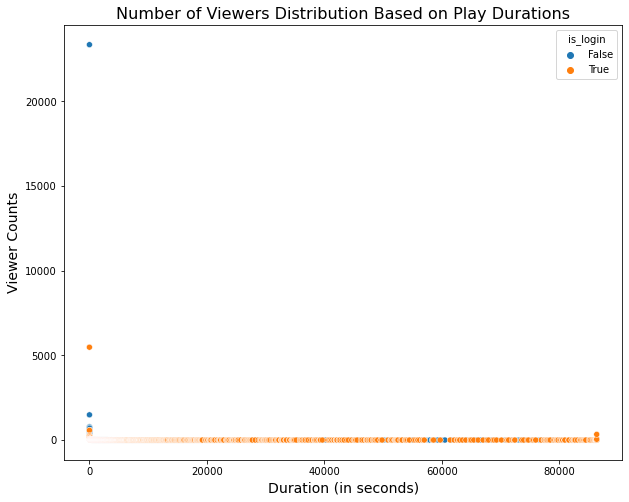

In [45]:
# number of viewers based on login status and play duration
df_login_duration = df[['is_login', 'duration']].value_counts()
df_login_duration = pd.pivot_table(df_login_duration.to_frame(), values=0, index=['is_login', 'duration'], aggfunc=np.sum)
df_login_duration = df_login_duration.reset_index()
df_login_duration = df_login_duration.rename(columns={0: 'Counts'})

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Number of Viewers Distribution Based on Play Durations', fontsize=16)
sns.scatterplot(data=df_login_duration, x='duration', y='Counts', hue='is_login', ax=ax)

ax.set_xlabel('Duration (in seconds)', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)

plt.show()


Key Points:
- One relation that I found is that as the duration of the play increases, it is more likely for people to log in to the website/app.
- There are more unlogged-in viewersr when the play duration is short (close to 0).

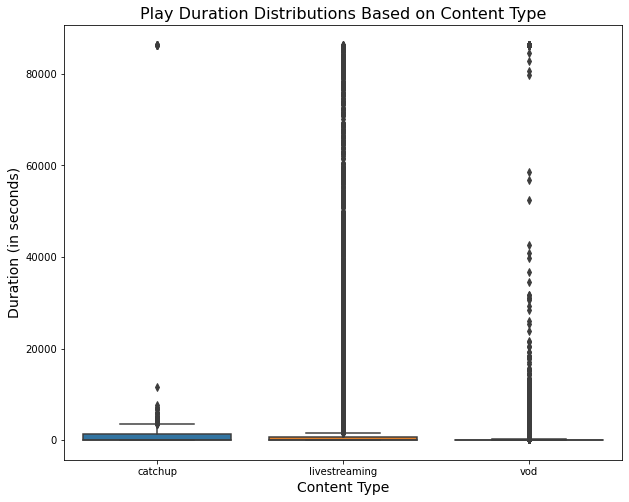

In [46]:
# number of viewers based on content type and play duration
df_content_duration = df[['content_type', 'duration']]
df_content_duration = df_content_duration.sort_values(by=['content_type'])

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Play Duration Distributions Based on Content Type', fontsize=16)
sns.boxplot(data=df_content_duration, x='content_type', y='duration', ax=ax)

ax.set_xlabel('Content Type', fontsize=14)
ax.set_ylabel('Duration (in seconds)', fontsize=14)
ax.set_xticklabels(sorted(df['content_type'].unique()))

plt.show()

Key Points:
- There is a potetial outlier in 'catchup' content (> 80000 seconds play duration).
- The distributions on 'livestreaming' and 'vod' categories are more evenly distributed.

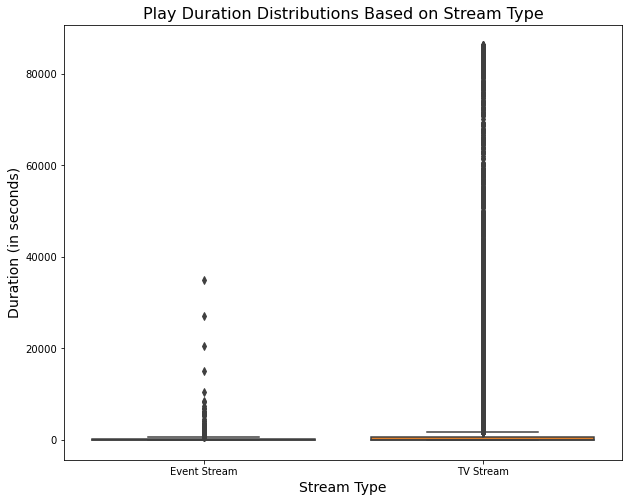

In [47]:
# number of viewers based on stream type and play duration
df_stream_duration = df[['stream_type', 'duration']]
df_stream_duration = df_stream_duration.sort_values(by=['stream_type'])

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Play Duration Distributions Based on Stream Type', fontsize=16)
sns.boxplot(data=df_stream_duration, x='stream_type', y='duration', ax=ax)

ax.set_xlabel('Stream Type', fontsize=14)
ax.set_ylabel('Duration (in seconds)', fontsize=14)
ax.set_xticklabels(['Event Stream', 'TV Stream'])

plt.show()

Key Points:
- In my opinion, there is nothing interesting in this particular analysis, except that 'TV Stream' stream type is more evenly distributed and more robust to outliers

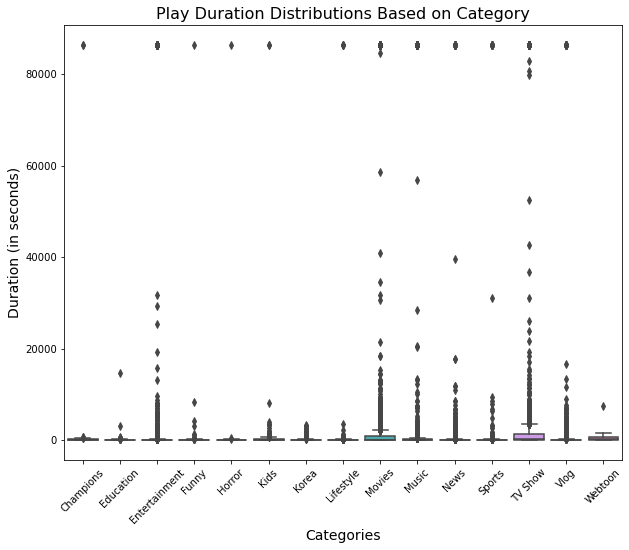

In [48]:
# number of viewers based on category and play duration
df_category_duration = df[['category_name', 'duration']]
df_category_duration = df_category_duration.sort_values(by=['category_name'])

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Play Duration Distributions Based on Category', fontsize=16)
sns.boxplot(data=df_category_duration, x='category_name', y='duration', ax=ax)

ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Duration (in seconds)', fontsize=14)
ax.set_xticklabels(sorted(df['category_name'].dropna().unique()), rotation=45)

plt.show()

Key Points:
- Almost all categories have plays/movies which exceed 80000 s of play time, except education, Korea, and Webtoon.

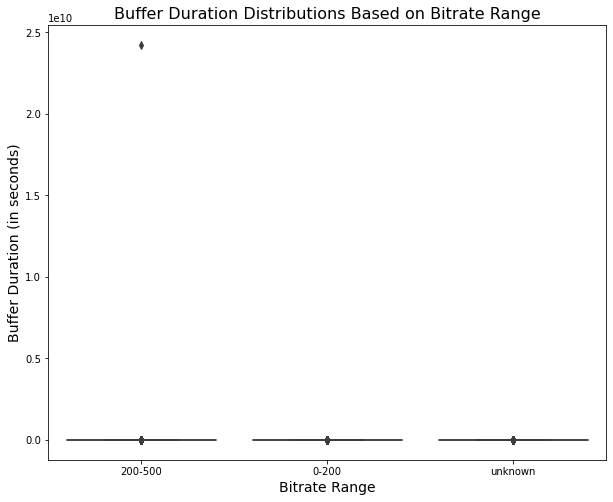

In [49]:
# number of viewers based on bitrate range and buffer duration
df_bitrange_buffer = df[['bitrate_range', 'buffer_duration']]

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Buffer Duration Distributions Based on Bitrate Range', fontsize=16)
sns.boxplot(data=df_bitrange_buffer, x='bitrate_range', y='buffer_duration', ax=ax)

ax.set_xlabel('Bitrate Range', fontsize=14)
ax.set_ylabel('Buffer Duration (in seconds)', fontsize=14)

plt.show()

Key Points:
- People who experieced buffer can be found on 200-500 bitrate setting.
> Simply said, bitrate is what you usually see in most video player when setting the quality of the video (e.g. 360p, 720p). This is often abbreviated with Mbps (Megabits per second). It is a way to tell the player what video quality should the video is set to. The higher the bitrate, the higher quality video is displayed. However, the user must also "pay the price" in exchange for higher quality and in this case, it's the connection speed which can cause buffers. Bufferr is simply caused by the user's connection speed that cannot keep up with the bitrate range. 

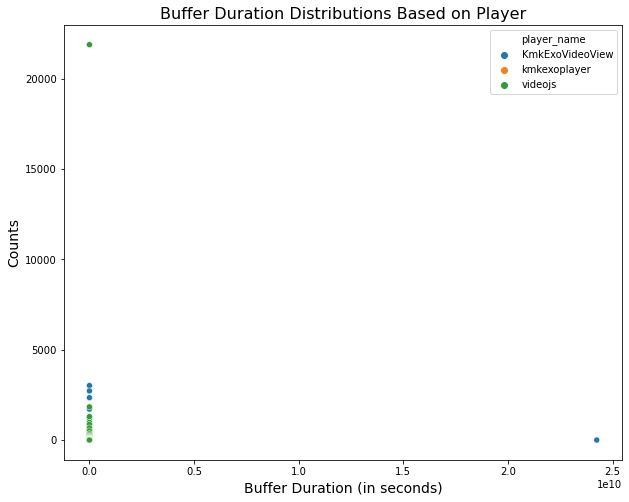

In [50]:
df_player_buffer = df[['player_name', 'buffer_duration']].value_counts()
df_player_buffer = pd.pivot_table(df_player_buffer.to_frame(), values=0, index=['player_name', 'buffer_duration'], aggfunc=np.sum)
df_player_buffer = df_player_buffer.reset_index()
df_player_buffer = df_player_buffer.rename(columns={0: 'Counts'})

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Buffer Duration Distributions Based on Player', fontsize=16)
sns.scatterplot(data=df_player_buffer, x='buffer_duration', y='Counts', hue='player_name')

ax.set_xlabel('Buffer Duration (in seconds)', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

plt.show()

Key Points:
- Videojs and kmkexoplayer do not experience buffer
- kmkexovideoview is the only player with ~2.5 s buffer duration.

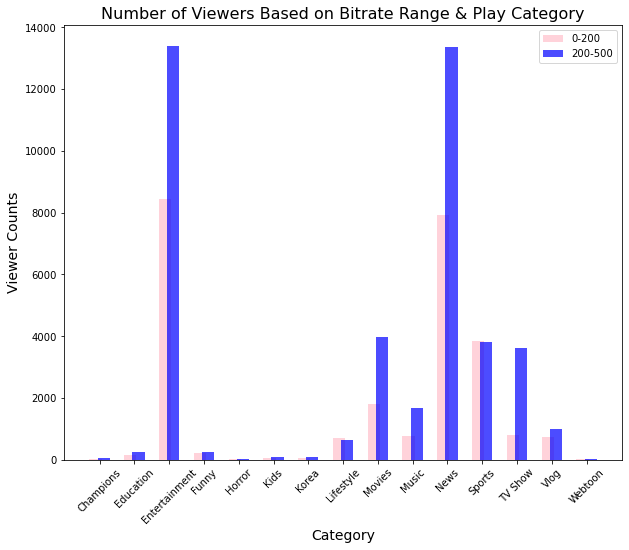

In [51]:
# number of viewers based on bitrate range and play category
df_bitrate_category = df[['bitrate_range', 'category_name']].value_counts()
df_bitrate_category = pd.pivot_table(df_bitrate_category.to_frame(), values=0, index=['bitrate_range', 'category_name'], aggfunc=np.sum)
df_bitrate_category = df_bitrate_category.reset_index()
df_bitrate_category = df_bitrate_category.rename(columns={0: 'Counts'})
        
df_bitrate_category = df_bitrate_category.sort_values(by=['category_name'])
x = np.arange(len(df_bitrate_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/3, df_bitrate_category[df_bitrate_category['bitrate_range'] == '0-200']['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/3, df_bitrate_category[df_bitrate_category['bitrate_range'] == '200-500']['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Bitrate Range & Play Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_bitrate_category['category_name'].unique(), rotation=45)
ax.legend(['0-200', '200-500'])

plt.show()

Key Points:
- Most people set their bitrate range to 200-500 even for a short duration of news or entertainment plays.
- 0-200 bitrate only surpasses 200-500 bitrate on 'Lifestyle' category.

## Multivariate Analysis
Finally, we are in the last part of the analysis. In this part, I utilized 3 or more features to analyse each components. In this case, I will deep dive into the problems which often appear on the previous parts: bitrate range, buffer duration, and premium contents access.

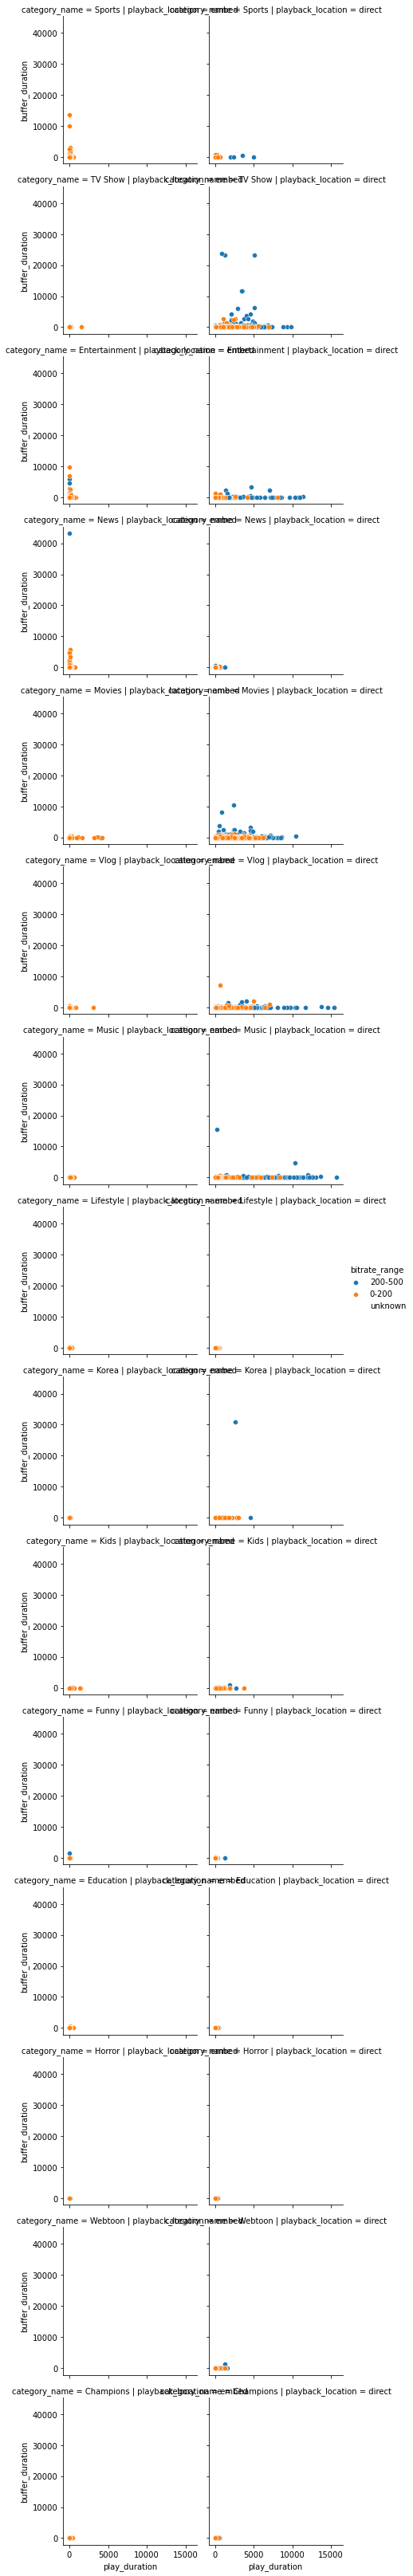

In [154]:
g = sns.FacetGrid(df, col='playback_location', row='category_name', hue='bitrate_range')
g.map(sns.scatterplot, 'play_duration', 'buffer_duration').add_legend()

plt.show()

In the plot above, we analyse buffer duration in each play categories according to their bitrate range.

Key Points:
- We can see here that buffer occured on people who watched sports, TV show, entertainment, news, movies, and music categories.
- Most buffer occured when the birate range was set to 200-500.

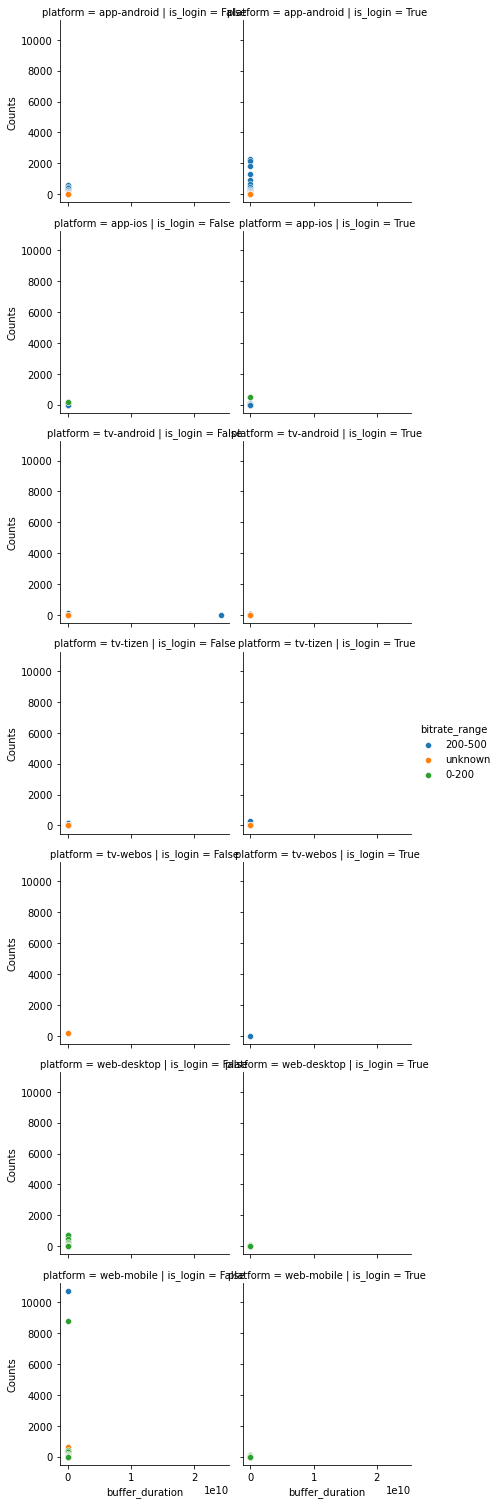

In [5]:
df_multi1 = df[['is_login', 'platform', 'buffer_duration', 'bitrate_range']].value_counts()
df_multi1 = pd.pivot_table(df_multi1.to_frame(), values=0, index=['is_login', 'platform', 'buffer_duration', 'bitrate_range'], aggfunc=np.sum)
df_multi1 = df_multi1.reset_index()
df_multi1 = df_multi1.rename(columns={0: 'Counts'})

g = sns.FacetGrid(df_multi1, col='is_login', row='platform', hue='bitrate_range')
g.map(sns.scatterplot, 'buffer_duration', 'Counts').add_legend()

plt.show()

Now, we will see on which platform do the buffers appeared on:
- As expected, buffer mostly occurred on phone-based platform.
- This confirms our findings earlier that it is possible that their connection speeds cannot keep up with the bitrate range they set (200-500).
- ~2 seconds buffer surprisingly appeared on'tv-android' platform (this might be a possible outlier).

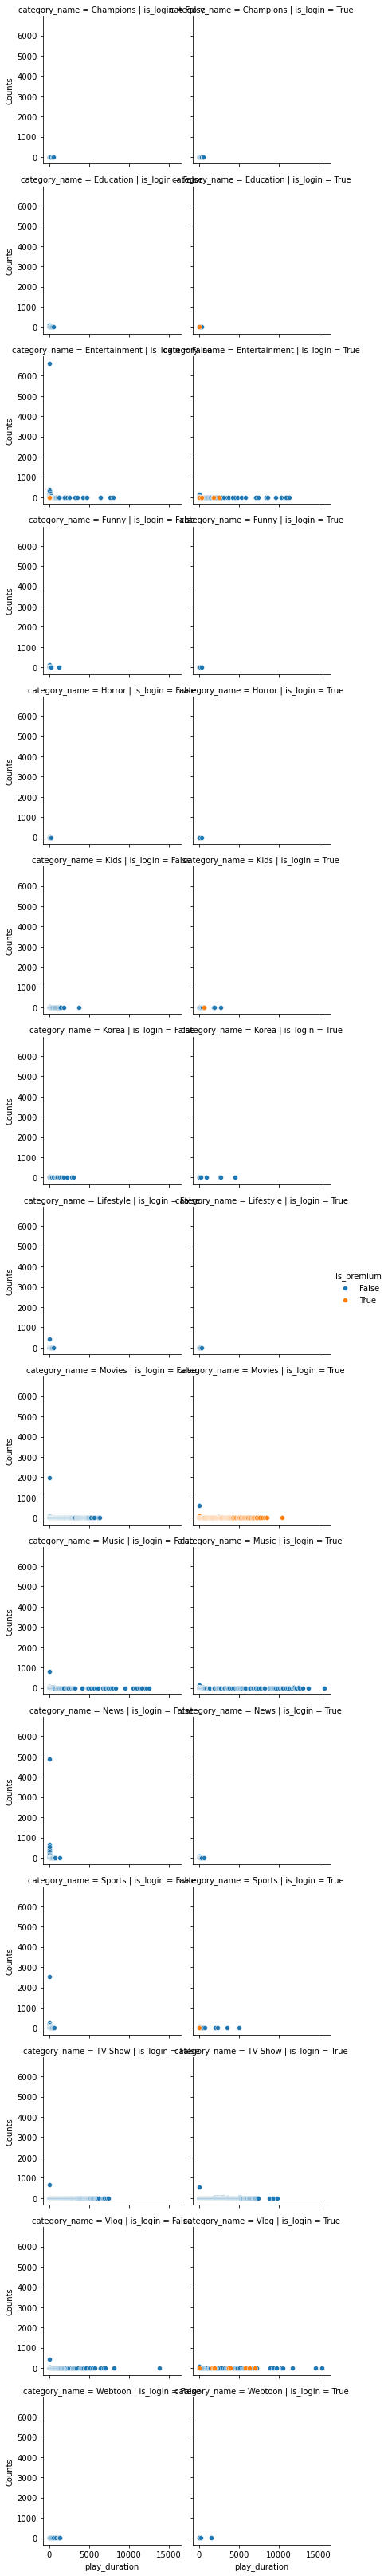

In [58]:
df_multi2 = df[['is_login', 'is_premium', 'play_duration', 'category_name']].value_counts()
df_multi2 = pd.pivot_table(df_multi2.to_frame(), values=0, index=['is_login', 'is_premium', 'play_duration', 'category_name'], aggfunc=np.sum)
df_multi2 = df_multi2.reset_index()
df_multi2 = df_multi2.rename(columns={0: 'Counts'})

g = sns.FacetGrid(df_multi2, col='is_login', row='category_name', hue='is_premium')
g.map(sns.scatterplot, 'play_duration', 'Counts').add_legend()

plt.show()

Key Points:
- Most movies category plays are reserved for premium access.
- We can also investigate that some vlogs, entertainment, and kids category contain premium access.

## Conclusion
From the three-part analysis I have provided above, we can conclude several points that can be useful for the decision makers:
1. Most of Vidio user/viewers is not logged in to their accounts (or even not registered yet).
2. This (point 1) can be related to the playback locations (embedded vs direct) for each viewer. Most of the videos are embedded into various external referrers instead.
3. Those external referrers include: liputan6, kapanlagi, merdeka, and bola. For the non-link referrers: livestreaming webpage, home, and live index.
4. During the streaming/watching session, several viewers experienced buffers varying from 0.1 to 2.0 seconds.
5. Most buffers were caused by the bitrate range that was set to 200-500 on mobile phone platforms (web mobile and mobile app).
6. Most people really enjoy watching entertainment, news, sport, TV shows, and music contents.
7. The number of ads also in accordance with the large number of viewers in those categories mentioned in point 6.
8. Premium access contents mostly exist on movies category.

## Question 4: How could we know the platform that user keenly used to watch? And how do you convince us that user are keenly watch on that platform? (For example, user keenly watch on web platform, because ... )

Before jumping into any conclusion, first, let's analyse the findings I found earlier:

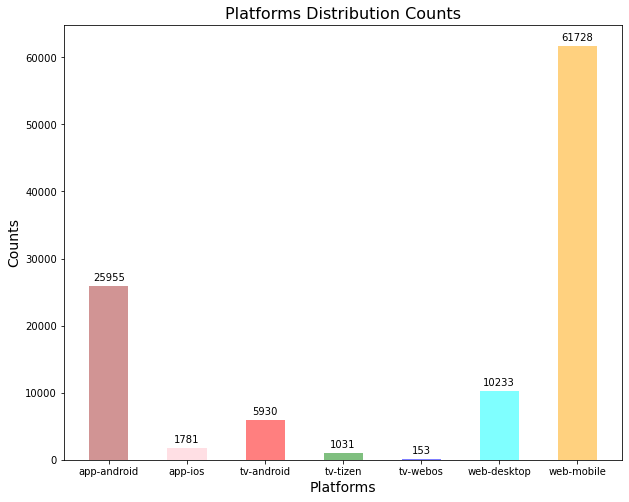

In [149]:
# platforms
PLATFORMS = df['platform'].unique()
df_platform = df[['platform']].value_counts()
df_platform = pd.pivot_table(df_platform.to_frame(), values=0, index=['platform'], aggfunc=np.sum)
df_platform = df_platform.reset_index()
df_platform  = df_platform.rename(columns={'index':'platform', 0: 'Counts'})

df_platform = df_platform.sort_values(by='platform')

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PLATFORMS))
width = 0.5
bar = ax.bar(x, df_platform['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Platforms Distribution Counts', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_platform['platform'].unique())

autolabel(bar)

plt.show()

The cell above is copied from the 'Univariate Analysis' part. As we can see, generally, a lot of users prefer watching movies/plays through web browsers installed inside their smartphones (web-mobile) followed by the Vidio app itself on android (app-android), and desktop browsers (web-desktop). This fact is supported by another data analysis from the "Operating System Distribution Counts" analysis which shows that the Android OS dominates the chart by a high margin (over 50%). However, we are still not sure why Android users (especiall web-mobile platform) topped the chart.

Next, let's see which kinds of users accessed Vidio through different platforms:

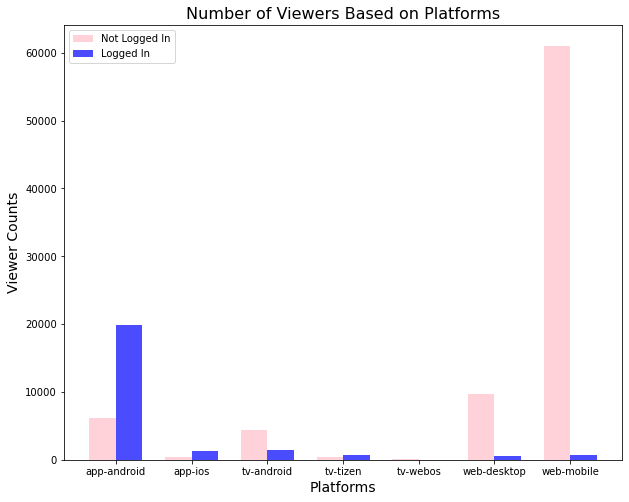

In [150]:
# number of viewers based on login status and platform
df_login_platform = df[['is_login', 'platform']].value_counts()
df_login_platform = pd.pivot_table(df_login_platform.to_frame(), values=0, index=['is_login', 'platform'], aggfunc=np.sum)
df_login_platform = df_login_platform.reset_index()
df_login_platform = df_login_platform.rename(columns={0: 'Counts'})

df_login_platform = df_login_platform.sort_values(by=['platform'])

x = np.arange(len(PLATFORMS))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_platform[df_login_platform['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_platform[df_login_platform['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Platforms', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_platform['platform'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

Based on the "login status" of the viewers, it seems like viewers who did not log in occurred more often than the ones who did, except for 'app-android' platform. This does make sense assuming that the Vidio app requires the user to log in before using its services. On the other hand, accessing Vidio outside of the app itself might not require the user to be logged in. For example, user watched a video embedded or directed from a news website (e.g. Kompas, The Jakarta Post, etc.)

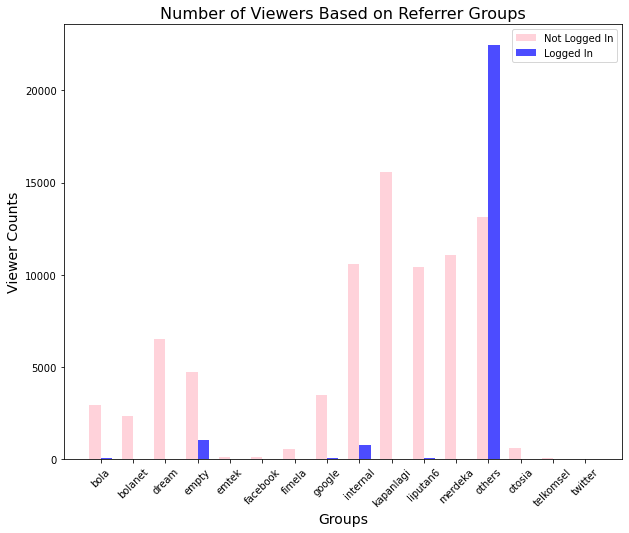

In [151]:
# number of viewers based on login status and referrer groups
df_login_refgroup = df[['is_login', 'referrer_group']].value_counts()
df_login_refgroup = pd.pivot_table(df_login_refgroup.to_frame(), values=0, index=['is_login', 'referrer_group'], aggfunc=np.sum)
df_login_refgroup = df_login_refgroup.reset_index()
df_login_refgroup = df_login_refgroup.rename(columns={0: 'Counts'})

i = len(df_login_refgroup)
for ref in df_login_refgroup[df_login_refgroup['is_login'] == 0]['referrer_group'].tolist():
    if ref not in df_login_refgroup[df_login_refgroup['is_login'] == 1]['referrer_group'].tolist():
        row = pd.DataFrame([True, ref, 0])
        df_login_refgroup.loc[i] = [True, ref, 0]
        i += 1

df_login_refgroup = df_login_refgroup.sort_values(by=['referrer_group'])

x = np.arange(len(GROUP))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_refgroup[df_login_refgroup['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_refgroup[df_login_refgroup['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Referrer Groups', fontsize=16)
ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_refgroup['referrer_group'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

As expected, if we analyse from 'Referrer Groups' point of view, we can see many viewers who were not logged in when they watched the videos. Most of them were coming from news & forum websites (kapanlagi, liputan6, merdeka, bola, etc.)

Surprisingly, if we categorized 'web-mobile' platform users based on the movie/play duration, we got another interesting result:

Average play duration: 1553.6296296296296 s


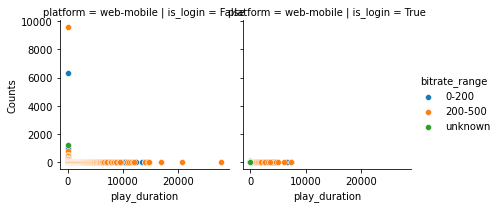

In [160]:
df_multi1 = df[['is_login', 'platform', 'play_duration', 'bitrate_range']].value_counts()
df_multi1 = pd.pivot_table(df_multi1.to_frame(), values=0, index=['is_login', 'platform', 'play_duration', 'bitrate_range'], aggfunc=np.sum)
df_multi1 = df_multi1.reset_index()
df_multi1 = df_multi1.rename(columns={0: 'Counts'})
df_multi1 = df_multi1[df_multi1['platform']=='web-mobile']

print('Average play duration:', df_multi1['play_duration'].mean(), 's')
g = sns.FacetGrid(df_multi1, col='is_login', row='platform', hue='bitrate_range')
g.map(sns.scatterplot, 'play_duration', 'Counts').add_legend()

plt.show()

Users watching through 'web-mobile' have an average of 1553 seconds of play duration. This means that people "are not willingly" to watch videos more than 25 minutes (~1500 seconds) through their phones.

Finally, we can draw several conclusions based on the analysis above:
1. Most of Vidio users watched on web browsers installed in their phones
2. Most of them were only "guests" who were not logged in. This is due to the fact that they probably watched videos through referrer links when they are actually reading news from other websites like kapanlagi, liputan6, merdeka, bola, etc.
3. People who watched through web mobile find it comfortable to watch videos which are not longer than 25 minutes.

## Question 5: Could you list top 10 visitors by using play_duration per day?

To answer this question, we have to apply several processing steps. First, we will take the `play_time` column which contains the information about when the play started in a <b>UTC Timestamp</b>.

In [55]:
df['play_time']

0         2020-02-02T10:21:20.000Z
1         2020-02-02T12:17:33.000Z
2         2020-02-02T01:26:42.000Z
3         2020-02-02T13:45:05.000Z
4         2020-02-02T13:23:40.000Z
                    ...           
106806    2020-02-14T13:57:41.000Z
106807    2020-02-14T05:18:25.000Z
106808    2020-02-13T19:52:13.000Z
106809    2020-02-14T01:08:03.000Z
106810    2020-02-14T09:05:36.000Z
Name: play_time, Length: 106811, dtype: object

I will convert this format into a more readable format (dd-mm-yyyy). The `dateutil.parser` built-in library has a method `parse` to convert UTC Timestamp and extract each day, month, and year.

In [56]:
# empty list of the converted date
time_list = []
start = df['play_time']
for s in start:
    # parse UTC timestamp
    day = dateutil.parser.parse(s).date()
    # extract day, month, year
    date_format = '{}-{}-{}'.format(day.day, day.month, day.year)
    # add them to the list
    time_list.append(date_format)

# create a new column called 'visit_time' and fill in the values
df['visit_time'] = time_list

Now we can proceed with our analysis. The next thing to do is to group these rows according to the date ( `visit_time` column we just created earlier). We will also need the `hash_watcher_id` to indicate the user/viewer

In [57]:
# only include 'hash_watcher_id', 'visit_time', and 'play_duration'
df_q5 = df[['hash_watcher_id' ,'visit_time', 'play_duration']]
# create a pivot table grouped by 'visit_time'
df_q5_pivot = pd.pivot_table(df_q5, values='play_duration', index=['hash_watcher_id'], columns=['visit_time'], fill_value=0)
df_q5_pivot = df_q5_pivot.reset_index()
df_q5_pivot.index = df_q5_pivot.index.set_names(['index'])

# show top 10 viewers/visitors sorted by duration
unique_time_list = df['visit_time'].unique().tolist()
for time in sorted(unique_time_list):
    per_day = df_q5_pivot[['hash_watcher_id', time]].sort_values(by=time, ascending=False)[:10]
    print('Top 10 visitor on {} (sorted by duration):\n{}\n'.format(time, per_day))

Top 10 visitor on 1-2-2020 (sorted by duration):
visit_time                                    hash_watcher_id  1-2-2020
index                                                                  
60491       961b22668d35ca910c86c8b0d120c32050cb2475c81747...   34305.0
80412       c789ddbfccbc598d48b2262fac1454c15b3354195f40ad...   33030.0
63626       9dd5fb24ffcbbe3052c181e972c771ab48b6e916c7cdfa...   17640.0
39843       62b93427d06f2076f5967ee1835687e978d0148e2fa64c...   16455.0
61861       999a8c8874a8bcbe645a0c3d6acfd07f8aea0f85f65734...   11865.0
80906       c8d4d6c08958e4ec9872cb226dd31706b6569c897955a6...   11835.0
2266        05bae5701a4f672e3badb6c89d5d5a4628521a73fd17a9...    7200.0
72622       b44d62c42a980583c1fe0a2704abd40402aa8d636b2126...    6875.0
56806       8cbe7fa93e4af1fc3694fa7bf6dd41488484729066e552...    6748.0
69251       abd7006dddb602f6ae4248726d3c948aa4b31068a80fe0...    6153.0

Top 10 visitor on 10-2-2020 (sorted by duration):
visit_time                          

### Bonus

In [58]:
df_daily_visitor = df[['hash_watcher_id' ,'visit_time']].value_counts()
df_daily_visitor = pd.pivot_table(df_daily_visitor.to_frame(), values=0, index=['hash_watcher_id'], columns='visit_time', fill_value=0, aggfunc=np.sum)
df_daily_visitor = df_daily_visitor.reset_index()

unique_time_list = df['visit_time'].unique().tolist()
avg = 0
for time in sorted(unique_time_list):
    total_visits = df_daily_visitor[time].sum()
    avg += total_visits 
    print('Total visitors per {}: {} visitors'.format(time, total_visits))
print('\nAverage visitors: {} visitors'.format(avg/len(unique_time_list)))

Total visitors per 1-2-2020: 979 visitors
Total visitors per 10-2-2020: 7772 visitors
Total visitors per 11-2-2020: 7720 visitors
Total visitors per 12-2-2020: 8473 visitors
Total visitors per 13-2-2020: 8073 visitors
Total visitors per 14-2-2020: 6074 visitors
Total visitors per 15-2-2020: 7812 visitors
Total visitors per 16-2-2020: 6161 visitors
Total visitors per 2-2-2020: 6377 visitors
Total visitors per 3-2-2020: 6891 visitors
Total visitors per 4-2-2020: 6792 visitors
Total visitors per 5-2-2020: 6601 visitors
Total visitors per 6-2-2020: 6971 visitors
Total visitors per 7-2-2020: 7071 visitors
Total visitors per 8-2-2020: 6450 visitors
Total visitors per 9-2-2020: 6594 visitors

Average visitors: 6675.6875 visitors


In [59]:
df[df['visit_time']=='12-2-2020']['title'].value_counts().sort_values(ascending=False)[:10]

SCTV                                                                  567
Indosiar                                                              510
TRANS TV                                                              313
Wanita Ludahi Gagang Pintu Apartemennya, Diduga Sebar Virus Corona    276
RCTI                                                                  225
Trans7                                                                172
Karen Idol Bagikan Kenangan dengan Sang Anak di Instagram             172
Karen Pooroe Tuding Arya Claproth Lalai                               162
Video Polisi Tes Kandungan Sabu Cair dalam Mainan Anak-anak           162
GTV                                                                   147
Name: title, dtype: int64

## Recommendation System

Apart from the EDA and Data Visualization I provided above, I also included a very simple yet powerful a machine learning algorithm related to 'Recommendation System'. Building recommender systems generally can be done with 2 popular methods: 'Content-based' and 'Collaborative Filtering'. Here, I applied the 'Content-based' recommender system since the dataset does not save users' score (rating) on certain plays/movies. Unlike collaborative filtering algorithm that heavily relies on user-item interaction, content-based recommender systems try to build a model based on other "available" features.
> Simply said, 'Content-based' filter will simply pick items with similar content (items) and recommend it/them to us.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### Cosine Similarity
Since we only rely on 3 features: 'hash_play_id', 'title', and 'category_name', we have to find other way to measure similarity between plays/movies. <b>Cosine similarity</b> exactly measures how close/far between items. Cosine similarity can be defined as a 'distance' between items and with vectors, we can calculate the dot product:

<div class="math">
\begin{equation}
  similarity = \cos(\theta) = \frac{u . v}{\| u \| \| v \| }  
\end{equation}
</div>

Remember that 'category_name' column has some empty rows:
- Number of empty values in column 'hash_play_id': 0 (0.00%)
- Number of empty values in column 'title': 0 (0.00%)
- <b>Number of empty values in column 'category_name': 271020 (36.50%)</b>

I filled those empty values with mode (a value which occurs the most frequently in the column)

In [131]:
# only include 3 features I mentioned above
to_include = ['hash_play_id', 'title', 'category_name']
df_new = df[to_include]
# fill empty/nan values with mode
df_new = df_new.fillna(df_new['category_name'].mode()[0])

print(df_new['category_name'].isnull().sum())

0


Now we are ready to build our recommender system. Please note that I sampled 50% of the data beforehand. This is because the data is relatively large even with 1% of raw data. If we had not sampled the data, we would end up with 106811 rows of data. Which means, when we calculate the cosine similarity, we will get `106811 x 106811` matrix (or equals to 11.408.589.721 vector). This is really big for our memory to store!

Next, we utilize `scikit-learn`'s `CountVectorizer` (or we can use `TfidfVectorizer`) to create a simple frequency counter for the plays' categories. We will use these to calculate our cosine similarity and find which plays/movies to recommend

In [132]:
# sample half of the data
df_new = df_new.sample(frac=0.50, random_state=1)
# use CountVectorizer for a simple frequency counter
vectorizer = CountVectorizer()
# apply it to 'category_name' column
count_mat = vectorizer.fit_transform(df_new['category_name'])
# calculate cosine similarity
cosine_sim = cosine_similarity(count_mat, count_mat)
cosine_sim.shape

(53406, 53406)

In [133]:
indices = pd.Series(df_new.title)

def recommend(title, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_new.index)[i])
        
    return recommended_movies

Let's test our recommendation system!

In [141]:
# a user watched a movie/play
df_new = df_new.reset_index() # reset index since the old index is shuffled due to sampling
user = df_new.loc[0]
# recommend him/her other videos
recommendation_idx = recommend(user['title'])

In [142]:
user

index                                                         9157
hash_play_id     ef38e318808347e3984e78976e9df97306d2ae5104bc94...
title                                                     TRANS TV
category_name                                        Entertainment
Name: 0, dtype: object

In [143]:
print('Other videos you might like:')
for i in recommendation_idx:
    print(df_new['title'].loc[i])

Other videos you might like:
FTV SCTV - Neng Geulis Pujaan Hati
Vanesha Prescilla Paling Suka Adegan Dibonceng Dilan | MILEA: SUARA DARI DILAN
Ganteng Ganteng Serigala - Episode 27
FTV SCTV - Belut In Love
Zaenab di Lokasi Syuting, Paling Banyak Makan | AKHIR KISAH CINTA SI DOEL
Ver Quien A Hierro Mata (2019) Pelicula Completa En Castellano
Episode 12
Nicholas Saputra, Chairunisa, Mandy Marahimin Ngobrolin Film SEMES7A
Cincuenta Sombras Liberadas Pelicula Completa Netflix
Zaenab di Lokasi Syuting, Paling Banyak Makan | AKHIR KISAH CINTA SI DOEL


## Question 3
I put Question 3 on the last part on purpose, because I think it's easier for me to conclude and explain all of the tools and libraries I used to build this notebook.

First, let me rewrite the whole `import` statements into a single cell for readability purposes:

In [144]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
    
from urllib.parse import urlparse
import dateutil.parser
    
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
%matplotlib inline

I usually group the `import` statements according to their functionalities so that I can find them easier according to their groups
- 1st group: `pandas` and `numpy` for data loading, extraction, and manipulation. `Numpy` also provides a great tool for me to work with matrices, vectors, and other mathematical techniques.
- 2nd group: `seaborn` and `matplotlib` for data visualization.
- 3rd group: `urllib` and `dateutil` for utilities (date & url parsing).
- 4th group: `sklearn` for building statistical & machine learning models. It also provides simple and fast preprocessing methods.

Notes:
- I personally like `seaborn` because of <b>it provides a high-level interface for drawing attractive and informative</b> graphs. Additionally it is built on top of `matplotlib` and that is why I can freely customize the size of the figure, title, labels, ticks, legends, number of bins, etc.
- For parsing urls, you can also use regex (`import re`) to extract them. However, in my opinion, it is much faster and more simple to use `urllib.parse` and just call `urlparse(url)` to get the name of the link rather than reading a string and find the pattern using regex. It is also become harder to determine the patterns, because sometimes the urls are not uniform.

In [145]:
import re

print(re.findall(r'www\..+\..+', 'https://www.google.com')[0]) # this pattern might not work for longer and more complex urls (e.g. http://musical-notes.com/bands/heart)
print(urlparse('https://www.google.com').netloc)


www.google.com
www.google.com


- Lastly, `sklearn` or scikit-learn is a very powerful tool to implement a quick and dirty statistical/machine learning models. On top of that, there are plenty of algorithms from supervised to unsupervised learning for us to compare between performances.